<a href="https://colab.research.google.com/github/amelia-chew-2022/CS203-Project/blob/main/G4T8_CS105_Project_Submission_(Final)_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-block alert-info">
Singapore Management University<br>
CS105 Statistical Thinking for Data Science, 2022/23 Term 2
</div>

# CS105 Group Project Submission

-----
<img src="attachment:info.png" width="60" align="left"/>Provide your team details, including section, team number, team members, and the name of the dataset.
Complete all of the following sections. For any part requiring code to derive your answers, please create a code cell immediately below your response and run the code.
To edit any markdown cell, double click the cell; after editing, execute the markdown cell to collapse it.
<br>
-----

#### Section: G4
#### Team: T8
#### Members:
1. Axel Wong Jing Zhi
2. Chew Kym Sian Amelia
3. Pey Yu Wei, Nicholas
4. Timothy Koh Yu Jie
5. Wong Boon Jhee

#### Dataset: climate.csv

>#### Table of Contents
>
>- [Part I: Exploratory Data Analysis](#a_intro)
>    - [Overview of dataset](#a_overview)
>    - [Data pre-processing](#a_dataprocess)
>       - Missing data
>       - Outliers
>       - Hampel Filter
>       - Encoding
>    - [Exploratory analysis and visualisation](#a_eda)
>       - Summary of Numerical Datasets
>       - Summary of Categorical Datasets
>       - Univariate Visualisation for Numerical Dataset
>       - Univariate Visualisation for Categorical Dataset
>       - Bivariate Analysis
>       - Bivariate Analysis of Numerical Data
>       - Bivariate Analysis of Numerical & Categorical Data
>       - Trivariate Analysis with 2 independent variables and 1 dependent variable  


<a id="a_intro"></a>
# Part I: Exploratory Data Analysis (EDA) [8% of final grade]

In [ ]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt
import matplotlib;
import seaborn as sms
import math
from mpl_toolkits import mplot3d
from statsmodels.tsa.seasonal import seasonal_decompose


url='https://drive.google.com/file/d/1gMJf6eXoApzE17Z8CFY92BKKjLBAFWus/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url) #have the climate.csv file in the same directory as the notebook

In [ ]:
df.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,L,191.324,350.113,M,H,0.109
1,1983,6,2.167,345.52,1633.71,L,192.057,351.848,M,H,0.118
2,1983,7,1.741,344.15,1633.22,L,192.818,353.725,M,H,0.137
3,1983,8,1.130,NaN,1631.35,L,193.602,355.633,M,H,0.176
4,1983,9,0.428,340.17,1648.40,L,194.392,357.465,M,H,0.149


<a id="a_overview"></a>
## 1. Overview of dataset [15% of Part I]

**a.** Summarise the background of the dataset [limited to 50 words]

The dataset contains climate or atmospheric data. Each row corresponds to climate or atmospheric data captured for a given month. We will be using this dataset to investigate the impact of various factors on the average global temperature.

**b.** State the size of the dataset

In [ ]:
n_rows, n_cols = df.shape
print(f"#no of rows is {n_rows}")
print(f"#no of cols is {n_cols}")

#no of rows is 308
#no of cols is 11


There are 308 rows and 11 columns (before any data pre-processing)

**c.** For each variable, describe what it represents and its data type (numerical or categorical)

**Response.**

|Name|<p align="left"> Description|<p align="left"> Type| Details|
|:---:|:---:|:---:|:---:|
|Year|<p align="left"> Year of observation|<p align="left"> Categorical|
|Month|<p align="left"> Month of observation|<p align="left"> Categorical|
|MEI|<p align="left"> Multivariate El Nino Southern Oscillation Index|<p align="left"> Numerical|<p align="left"> A measure of the strength of the El Nino/La Nina-Southern Oscillation|
|CO2|<p align="left"> Atmospheric concentration of carbon dioxide|<p align="left"> Numerical|<p align="left"> Measured in parts per million by volume|
|CH4|<p align="left"> Atmospheric concentration of methane|<p align="left"> Numerical|<p align="left"> Measured in parts per million by volume|
|N2O|<p align="left"> Level of atmospheric concentration of nitrous oxide|<p align="left"> Categorical|<p align="left"> Possible values: “H”, “L”|
|CFC-11|<p align="left"> Atmospheric concentration of trichlorofluoromethane|<p align="left"> Numerical|<p align="left"> Measured in parts per million by volume|
|CFC-12|<p align="left"> Atmospheric concentration of dichlorodifluoromethane|<p align="left"> Numerical|<p align="left"> Measured in parts per million by volume|
|TSI|<p align="left"> Level of Total Solar Irradiance. TSI is the rate at which sun's energy is deposited per unit area|<p align="left"> Categorical|<p align="left"> Possible values: “H”, “M”, “L”|
|Aerosols|<p align="left"> Level of stratospheric “aerosol optical depth” at 550nm. This is linked to volcanoes, as eruptions result in new particles added to atmosphere|<p align="left"> Categorical|<p align="left"> Possible values: “H”, “M”, “L”|
|Temp|<p align="left"> Difference in temperature between average global temperature and a reference value|<p align="left"> Numerical|

<a id="a_dataprocess"></a>
## 2. Data pre-processing [35% of Part I]

**a.** For each variable, determine the percentage of missing data. For any column with missing data, describe how you resolve the issue. Clearly state any assumption you made.

**Response.**

In [ ]:
nrows,ncolm = df.shape
100-df.count()/nrows * 100

Year        0.000000
Month       0.000000
MEI         0.000000
CO2         6.493506
CH4         0.000000
N2O         0.000000
CFC-11      0.000000
CFC-12      0.000000
TSI         6.168831
Aerosols    0.000000
Temp        0.000000
dtype: float64

The columns CO2 and TSI have 20 and 19 missing data points respectively.

We assume that all the data in the dataset is indexed by time, as climate data often are measured at different points in time from our understanding.

### Missing data

#### **(i) CO2**

For the missing data in CO2, we first plot a graph to examine the existing data points for the CO2 data.

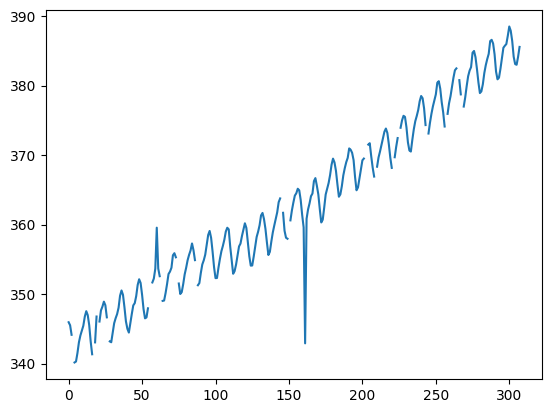

In [ ]:
plt.plot(df.index, df["CO2"])

We then noticed that the graph follows a clear pattern of increases and decreases, and thus we make the assumption that each data point is linearly related to the previous existing data point and the next existing data point. We then employ a method called linear interpolation, which would fill the missing data according to the assumed linear relationship.

In [ ]:
x = df["CO2"].interpolate(method = 'linear', inplace=True) # linear interpolation
df.CO2.count()

308

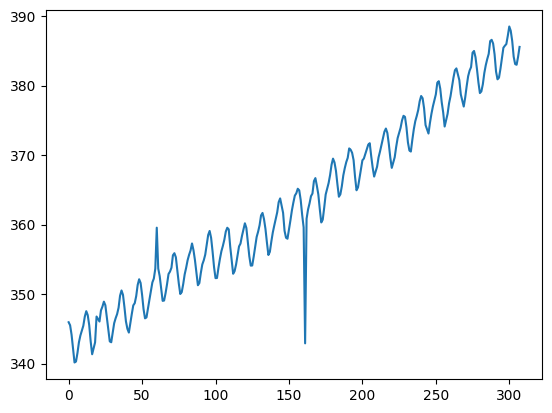

In [ ]:
plt.plot(df.index, df["CO2"])

#### **(ii) Date_Time**

We then check for any duplicates in the dates, which would require us to create a datetime object.

In [ ]:
date_time = df.Year.astype(str) + df.Month.astype(str).str.zfill(2)
df["date"] = date_time + "01" # form numerical representation of date
df["Date_Time"] = pd.to_datetime(df["date"], format='%Y%m%d')
df.Date_Time.duplicated().sum()

2

As there are 2 duplicates, we will look for the index of the duplicates, to try and fix the duplicates

In [ ]:
df.loc[df.Date_Time.duplicated(),:]

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp,date,Date_Time
60,1988,1,0.085,359.56,1705.69,L,246.043,444.729,M,M,0.175,19880101,1988-01-01
75,1989,1,-0.501,351.53,1707.22,H,255.528,468.631,H,M,0.168,19890101,1989-01-01


In [ ]:
df.loc[50:85]

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp,date,Date_Time
50,1987,7,1.847,349.910,1681.24,L,234.778,422.707,M,M,0.238,19870701,1987-07-01
51,1987,8,1.951,347.840,1678.77,L,235.789,426.191,M,M,0.219,19870801,1987-08-01
52,1987,9,1.835,346.520,1681.62,L,237.075,428.871,M,M,0.250,19870901,1987-09-01
53,1987,10,1.610,346.650,1701.48,L,238.697,431.542,M,M,0.174,19871001,1987-10-01
54,1987,11,1.253,347.960,1716.57,H,239.588,433.915,M,M,0.186,19871101,1987-11-01
55,1987,12,1.251,349.200,1708.14,L,240.058,436.000,M,M,0.314,19871201,1987-12-01
56,1988,1,1.092,350.440,1698.29,L,241.155,438.296,M,M,0.334,19880101,1988-01-01
57,1988,2,0.665,351.680,1701.18,L,242.064,440.937,M,M,0.189,19880201,1988-02-01
58,1988,3,0.456,352.240,1706.09,L,243.440,442.755,M,M,0.248,19880301,1988-03-01
59,1988,4,0.307,353.660,1708.18,L,244.954,443.846,M,M,0.224,19880401,1988-04-01


Observing the surrounding date time data around the duplicated dates, we can see that the dates related to the index, as the data is indexed by month of the year. Hence, we make the assumption that this holds true for the duplicate data, and clean accordingly.

In [ ]:
df.at[60,"Month"] = 5
df.at[75, "Month"] = 8 # manually replacing the data based on our assumption
date_time = df.Year.astype(str) + df.Month.astype(str).str.zfill(2)
df["date"] = date_time + "01"
df["Date_Time"] = pd.to_datetime(df["date"], format='%Y%m%d')
df.Date_Time.duplicated().sum()

0

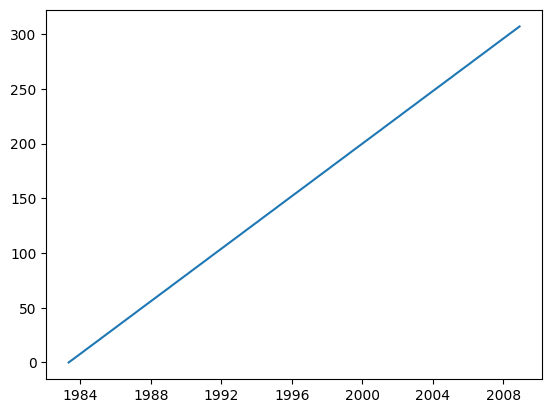

In [ ]:
plt.plot(df["Date_Time"], df.index)

As we can see, the data now has no more replicated dates.

#### **(iii) TSI**

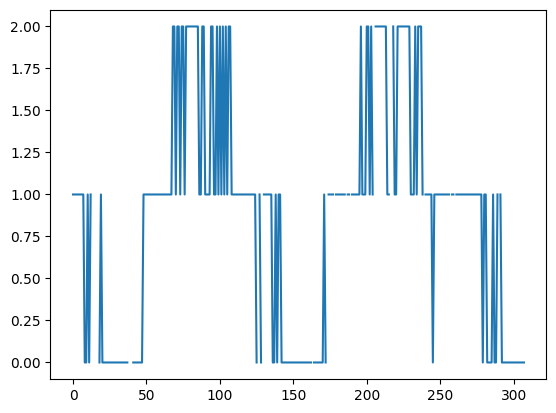

In [ ]:
#df["TSI"].mode()[0]
#df["TSI"].fillna(x,inplace=True)
#df["TSI"].value_counts()
tsi_encoding = {"L":0, "M":1, "H":2}
df["TSI_Encoding"] = df["TSI"].map(tsi_encoding)
df
plt.plot(df.index, df.TSI_Encoding)

We can see that the data oscilates between high and medium and low and that there are no sudden jumps from low to high or otherwise, hence we assume that the missing data points would depend on the previous and next existing datapoint. Therefore, we can use the same technique of linear interpolation, and round the values to the nearest integer.

M    160
L     95
H     53
Name: TSI, dtype: int64


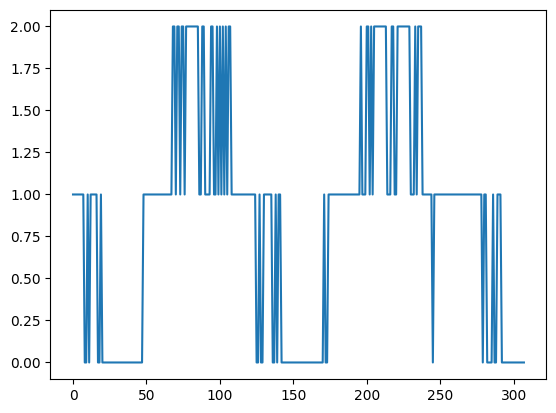

In [ ]:
df["TSI_Encoding"].interpolate(method = 'linear', inplace=True) #interpolate between encoded values
df["TSI_Encoding"] = df["TSI_Encoding"].apply(np.rint) #round interpolated data to the nearest integer
plt.plot(df.index, df["TSI_Encoding"])
tsi_decode = {0:"L", 1:"M", 2:"H"}
df["TSI"] = df["TSI_Encoding"].map(tsi_decode)
df["TSI_Encoding"] = df["TSI_Encoding"].astype(int) #convert encoding back to integer
print(df["TSI"].value_counts())

**b.** For each variable, identify outliers (if any) and describe how you resolve the issue. Clearly state any assumption you made.

**Response**

### Outliers

We first plot the data of all the continuous variables, so that possible outliers are obvious. We chose to plot a line graph of the data against the index to look for possible outliers. We chose not to use a boxplot to look for outlier data, as it is not a good fit for our data as it identifies outliers based on how far data deviates from the interquartile range.

From the earlier line graphs of our continuous data, we observed that some of our data increases logarithmically. This would result in the median and the standard deviation of the data points to be affected, as more datapoints will be on the higher end of the data. the mean will thus be higher, and lower data points that fit the overall trend of the graph might be wrongly classified as outliers.

Therefore, a line graph would allow us to visually determine whether a data point is an outlier with relation to the nearest data points.

#### **(i) MEI**

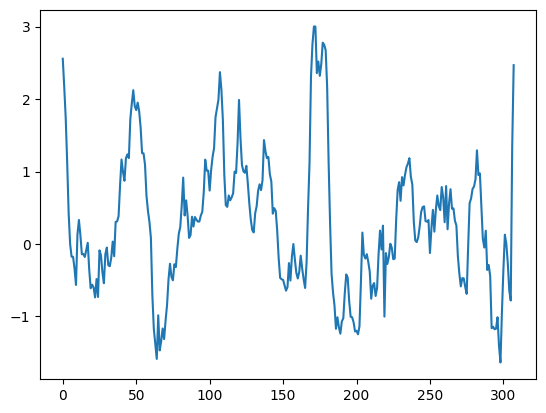

In [ ]:
plt.plot(df.index,df.MEI)

#### **(ii) CO2**

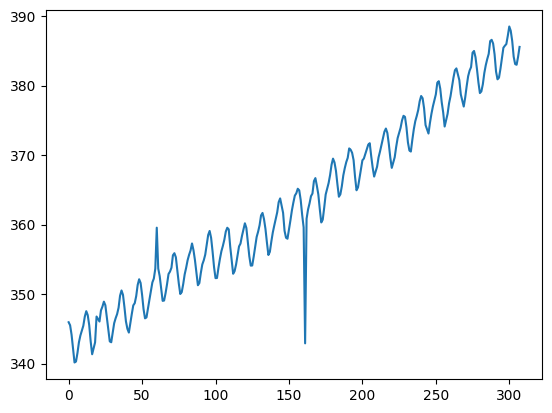

In [ ]:
plt.plot(df.index,df.CO2)

#### **(iii) CH4**

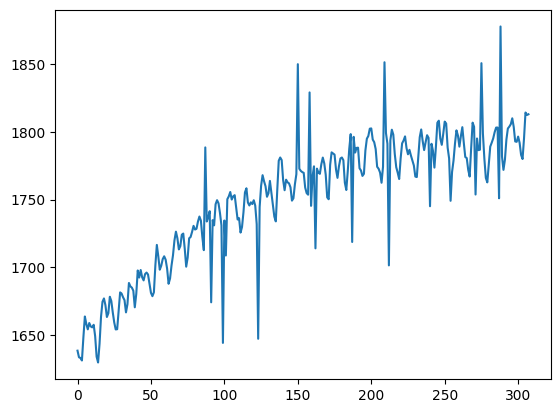

In [ ]:
plt.plot(df.index,df.CH4)

#### **(iv) CFC-11**

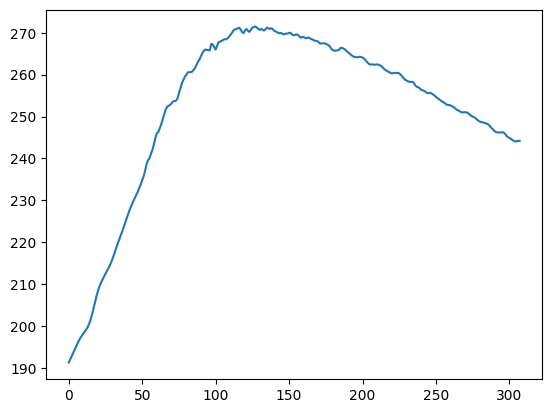

In [ ]:
plt.plot(df.index,df["CFC-11"])

#### **(v) CFC-12**

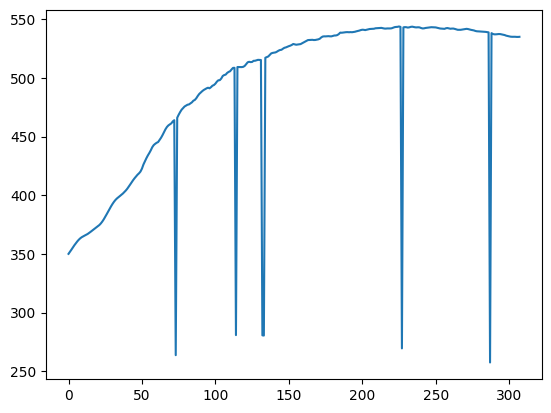

In [ ]:
plt.plot(df.index,df["CFC-12"])

#### **(vi) Temp**

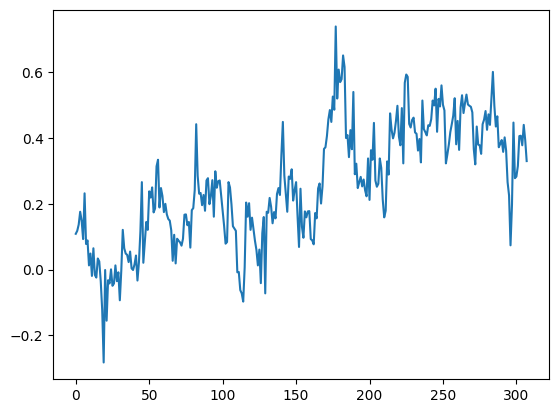

In [ ]:
plt.plot(df.index,df["Temp"])

As we can see, CO2, CH4 and CFC-12 have possible outlier data points, that vary greatly from the trend. We decided to apply a Hampel filter on these data, in order to remove any outliers.

### Hampel filter

The Hampel filter is a member of the class of decision filters that replaces the central value in the data window with the median if it lies far enough from the median to be deemed an outlier. For us, we chose a window size of 13, which would take the median of the value as well as values 6 months before and after the value. We also decided to classify datapoints that are 3 standard deviations from the median as outliers.


In [ ]:
def hampel(vals_orig, k=13, t0=3):
    '''
    vals_orig: pandas series
    k: size of window (including the sample; 13 is equal to 6 on either side of value)
    t0: number of standard deviations to accept
    '''
    #Make copy so original not edited
    vals=vals_orig.copy()
    #Hampel Filter
    L= 1.4826
    rolling_median=vals.rolling(k).median()
    difference=np.abs(rolling_median-vals)
    median_abs_deviation=difference.rolling(k).median()
    threshold= t0 *L * median_abs_deviation
    outlier_idx=difference>threshold
    vals[outlier_idx] = rolling_median[outlier_idx]
    return(vals)

#### **(i) CFC-12**

308


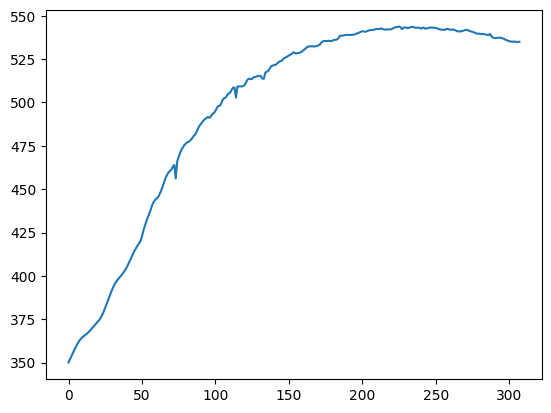

In [ ]:
df["CFC-12"] = hampel(df["CFC-12"])
plt.plot(df.index,df["CFC-12"])
print(df["CFC-12"].count())

#### **(ii) CH4**

308


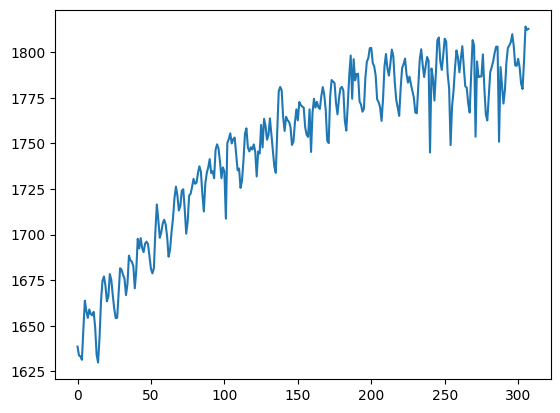

In [ ]:
df["CH4"] = hampel(df["CH4"])
plt.plot(df.index,df["CH4"])
print(df["CH4"].count())

#### **(iii) CO2**

308


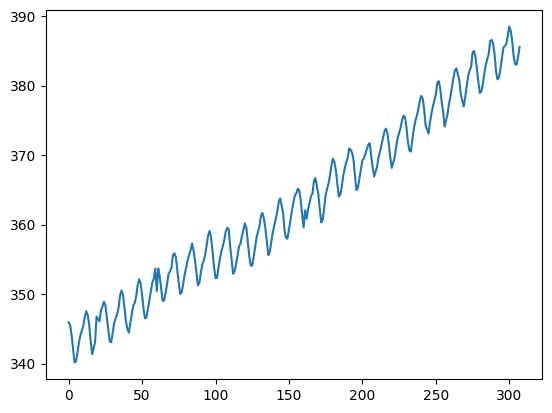

In [ ]:
df["CO2"] = hampel(df["CO2"])
plt.plot(df.index,df["CO2"])
print(df["CO2"].count())

#### **(iv) Temp**

308


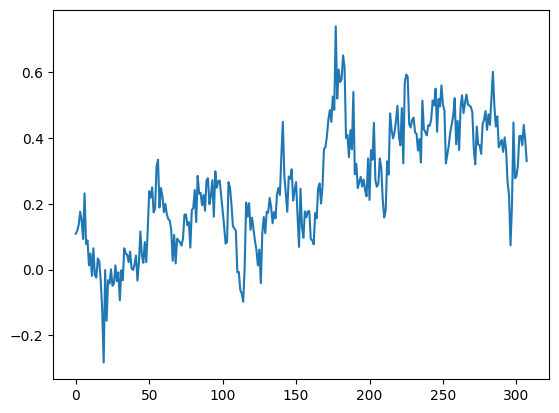

In [ ]:
df["Temp"] = hampel(df["Temp"])
plt.plot(df.index,df["Temp"])
print(df["Temp"].count())

We assumed that the rate of change of the first half of the window would be similar to the second half, thus a median value should be a suitable replacement for the outlier data should our assumption hold.

**c.** For categorical variables, perform the necessary encoding.

**Response.**

### Encoding

For categorical variables, TSI & Aerosols, we decided to use ordinal encoding which maps "L", "M" & "H" to the integers 0, 1 & 2 respectively. The rationale for ordinal encoding is that these values represent a natural order or hierarchy which can be reflected using ordinal encoding.

As for N2O, since the variable takes only two distinct values, we decided to use binary encoding that maps "L" and "H" to 0 and 1 respectively.  

In [ ]:
tsi_encoding = {"L":0, "M":1, "H":2}
df["TSI_Encoding"] = df["TSI"].map(tsi_encoding)
df["Aerosols_encoding"] = df["Aerosols"].map(tsi_encoding)
binary_encoding = {"L":0,"H":1}
df["N2O_Encoding"] = df["N2O"].map(binary_encoding)
df

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp,date,Date_Time,TSI_Encoding,Aerosols_encoding,N2O_Encoding
0,1983,5,2.556,345.96,1638.59,L,191.324,350.113,M,H,0.109,19830501,1983-05-01,1,2,0
1,1983,6,2.167,345.52,1633.71,L,192.057,351.848,M,H,0.118,19830601,1983-06-01,1,2,0
2,1983,7,1.741,344.15,1633.22,L,192.818,353.725,M,H,0.137,19830701,1983-07-01,1,2,0
3,1983,8,1.130,342.16,1631.35,L,193.602,355.633,M,H,0.176,19830801,1983-08-01,1,2,0
4,1983,9,0.428,340.17,1648.40,L,194.392,357.465,M,H,0.149,19830901,1983-09-01,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,2008,8,-0.266,384.15,1779.88,L,244.200,535.072,L,L,0.407,20080801,2008-08-01,0,0,0
304,2008,9,-0.643,383.09,1795.08,L,244.083,535.048,L,M,0.378,20080901,2008-09-01,0,1,0
305,2008,10,-0.780,382.99,1814.18,L,244.080,534.927,L,M,0.440,20081001,2008-10-01,0,1,0
306,2008,11,1.345,384.13,1812.37,L,244.225,534.906,L,M,0.394,20081101,2008-11-01,0,1,0


<a id="a_eda"></a>
## 3.	Exploratory analysis and visualization [50% of Part I]

**a.** For each variable, provide relevant summary statistics

**Response.**

### Summary of Numerical Datasets

In [ ]:
df1 = df[["MEI","CO2","CH4","CFC-11","CFC-12","Temp"]].describe()
df1.loc["range"] = df1.loc['max'] - df1.loc['min']
df1.loc['skew'] = df1.skew().tolist()
df1.loc['kurt'] = df1.kurtosis().tolist()

print (df1)

              MEI         CO2          CH4      CFC-11      CFC-12        Temp
count  308.000000  308.000000   308.000000  308.000000  308.000000  308.000000
mean     0.286750  363.238019  1749.031818  251.973068  497.470299    0.254789
std      0.946424   12.641547    45.625184   20.231783   57.841927    0.179479
min     -1.635000  340.170000  1629.890000  191.324000  350.113000   -0.282000
25%     -0.393000  353.020000  1722.380000  246.295500  472.410750    0.120750
50%      0.237500  361.905000  1762.560000  258.344000  528.356000    0.247500
75%      0.855250  373.710000  1786.267500  267.031000  540.524250    0.406250
max      3.001000  388.500000  1814.180000  271.494000  543.813000    0.739000
range    4.636000   48.330000   184.290000   80.170000  193.700000    1.021000
skew     2.998126   -1.536630    -0.868299   -1.330804   -0.980850    2.999924
kurt     9.990000   -1.164317    -2.163323   -0.889385   -0.941627    9.997599


**Range** measures the difference between max and min.

**Skewness** measures the symmetry of the distribution curve. Positive skewness means that the data points are more concentrated towards the right side, and the left tail is more pread out. Negative skewness means that the data points are more concentrated towards the left side, and the right tail is more spread out.

**Kurtosis** measures the tailedness of a distribution, which measures how often outliers occur. Positive kurtosis means peaked Positive kurtosis is a kurtosis greater than 3. The range of values for a positive kurtosis is from 1 to infinity. Negative kurtosis is a kurtosis less than 3. The range of values for a negative kurtosis is from -2 to infinity.

#### **(i) MEI**

The average value of MEI is 0.29, with a minimum value of -1.64 and maximum value of 3.00.

It has a range value of 4.64 and the small standard deviation of 0.95, indicating that the **values deviate little from the mean**.

In terms of 25%, 50% (median), and 75% quartiles, MEI has a value of -0.39, 0.24, 0.86 respectively.

In addition, it can be inferred that the MEI is more **skewed to the right** with a skew value of 3.00, and has a notably **higher peak** indicated by the kurtosis value of 9.99.

#### **(ii) CO2**

The average value of CO2 is 363.27, with a minimum value of 340.17 and maximum value of 388.50.

It has a range value of 48.33 and the moderate standard deviation of 12.62, indicating that the **values deviate more from the mean**.

In terms of 25%, 50% (median), and 75% quartiles, CO2 has a value of 353.08, 361.91, 373,71 respectively.

In addition, it can be inferred that the CO2 is more **skewed to the left** with a skew value of -1.54, and has a **flatter peak** indicated by the kurtosis value of -1.16.

#### **(iii) CH4**

The average value of CH4 is 1749.63, with a minimum value of 1631.35 and maximum value of 1851.23.

It has a range value of 219.88 and the moderate standard deviation of 46.0, indicating that the **values deviate moderately from the mean**.

In terms of 25%, 50% (median), and 75% quartiles, CH4 has a value of 1721.05, 1762.69, 1786.51 respectively.

In addition, it can be inferred that the CH4 is more **skewed to the left** with a skew value of -0.86, and has a **flatter peak** indicated by the kurt value of -2.15.

#### **(iv) CFC-11**

The average value of CFC-11 is 251.97, with a minimum value of 191.32 and maximum value of 271.49.

It has a range value of 80.17 and the moderate standard deviation of 20.23, indicating that the **values deviate moderately from the mean**.

In terms of 25%, 50% (median), and 75% quartiles, CFC-11 has a value of 246.30, 258.34, 267.03 respectively.

In addition, it can be inferred that the CFC-11 is more **skewed to the left** with a skew value of -1.33, and has a **flatter peak** indicated by the kurt value of -0.89.

#### **(v) CFC-12**

The average value of CFC-12 is 497.47, with a minimum value of 350.11 and maximum value of 543.81.

It has a range value of 193.70 and the moderate standard deviation of 57.82, indicating that the **values deviate moderately from the mean**.

In terms of 25%, 50% (median), and 75% quartiles, CFC-12 has a value of 472.41, 528.36, 540.52 respectively.

In addition, it can be inferred that the CFC-12 is moderately **symmetrical** with a skew value of -0.98, and has a **flatter peak** indicated by the kurtosis value of -0.94.

#### **(vi) Temp**

The average value of temp is 0.26, with a minimum value of -0.097 and maximum value of 0.74.

It has a range value of 0.84 and the moderate standard deviation of 0.18, indicating that the **values deviate moderately from the mean**.

In terms of 25%, 50% (median), and 75% quartiles, temp has a value of 0.13, 0.25, 0.41 respectively.

In addition, it can be inferred that the temp is notably **skewed to the right** with a skew value of 3.00, and has a notably **higher peak** indicated by the kurtosis value of 10.00.

### Summary of Categorical Dataset

The data below summarizes the 3 categorical values, "N2O", "TSI" and "Aerosols" which we encoded in our 2(c). The count returns the total number of values in each category. Unique returns how many possible categorical values there are to each column. Top returns the most frequent value of each category, and the frequency of the top below is returned under "freq".

In [ ]:
df2 = df[["N2O_Encoding","TSI_Encoding","Aerosols_encoding"]].astype('object').describe(include = 'object')
print(df2)

        N2O_Encoding  TSI_Encoding  Aerosols_encoding
count            308           308                308
unique             2             3                  3
top                0             1                  1
freq             300           160                144


#### **(i) N2O**

The data below shows the rate in which atmospheric concentration of N2O reaches a high level.

In [ ]:
high_N2O = len(df[df.N2O_Encoding == 1])
total = len(df)
print(f"Rate of N2O (High level) : {high_N2O / total}")

Rate of N2O (High level) : 0.025974025974025976


We then normalize the values of N2O level, which will be used in 3(b) for visualization using bar plot. "1" represents High, and "0" represents Low.

In [ ]:
data = df["N2O_Encoding"].value_counts(normalize=True)
data

0    0.974026
1    0.025974
Name: N2O_Encoding, dtype: float64

#### **(ii) TSI**



For TSI, we normalize the values, and the rate of each value ('0' == 'L', '1' == 'M', '2' == 'H') are as shown.

In [ ]:
data = df["TSI_Encoding"].value_counts(normalize=True)
data.sort_index()

0    0.308442
1    0.519481
2    0.172078
Name: TSI_Encoding, dtype: float64

#### **(iii) Aerosols**

Similarly, for Aerosols.

In [ ]:
data = df["Aerosols_encoding"].value_counts(normalize=True)
data.sort_index()

0    0.357143
1    0.467532
2    0.175325
Name: Aerosols_encoding, dtype: float64

**b.** For each variable, provide an appropriate visualisation depicting the distribution of its values, and summarize any key observation(s) you made.

**Response.**

### Univariate Visualisation for Numerical Dataset

#### **(i) MEI**

Text(0.5, 1.0, 'Density plot for MEI')

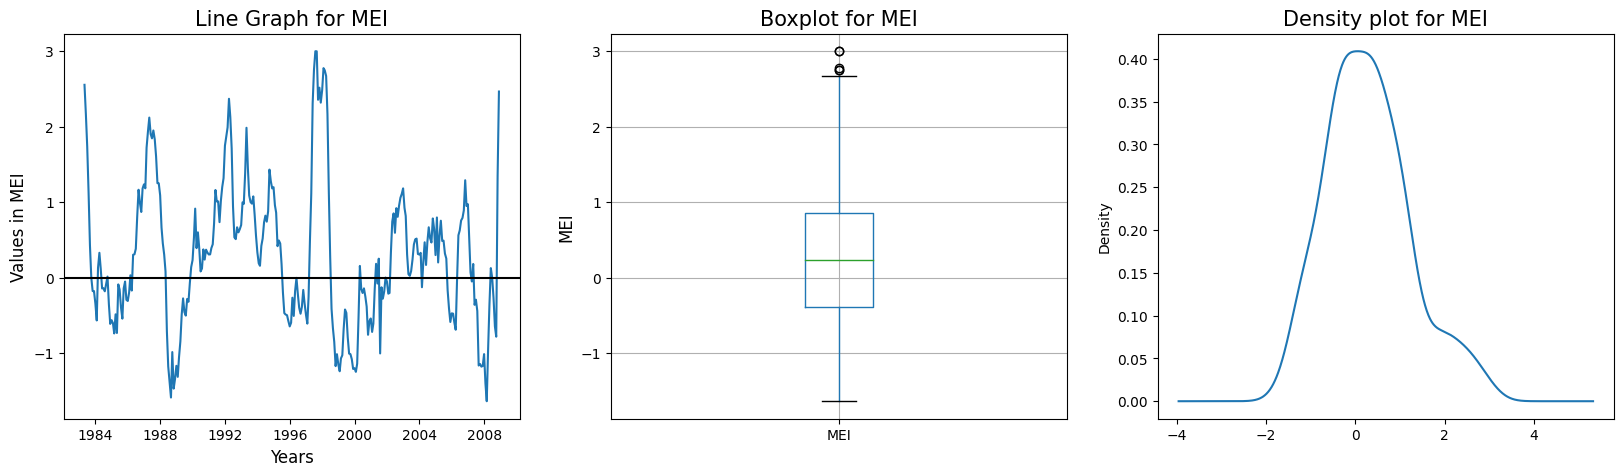

In [ ]:
plt.rcParams['figure.figsize'] = [20, 5] #Setting size for plts

plt.subplot(1,3,1)
plt.plot(df.Date_Time, df.MEI)
plt.axhline(y=0, color='black', linestyle='-')
plt.title("Line Graph for MEI", fontsize=15)
plt.xlabel("Years", fontsize=12)
plt.ylabel("Values in MEI", fontsize=12)

plt.subplot(1,3,2)
df[["MEI"]].boxplot()
plt.title("Boxplot for MEI", fontsize=15)
plt.ylabel("MEI", fontsize=12)

plt.subplot(1,3,3)
df["MEI"].plot.kde()
plt.title('Density plot for MEI', fontsize = 15)

From the line graph, we can see that MEI has **continuously fluctuated** throughout the years from 1984 to 2008, while its value still stays within its range steadily. Its values tend to lean towards the positive side, having a mean value of 0.29, being greater than 0, indicating that **El Niño (positive) occur more frequently than La Niña (negative)**. The line graph also shows a trend of El Niño and La Niña **happening in cycles** instead of random. With each cycle lasting about a year before the next.

The density plot and boxplot shows that MEI can be estimated to be a **normal distribution curve**, but has a steep curve in relation to its range, meaning it has a **small standard deviation**.

However, looking at the boxplot there are a few notable points especially near the peak value of 3 which is also reflected in the line graph. For example, the highest MEI value recorded in the dataset is in 1997 at 3.001.

In [ ]:
mei_desc = df.sort_values(['MEI'], ascending=[False])
mei_desc[['Year','Month','MEI']].head()

,Year,Month,MEI
171,1997,8,3.001
172,1997,9,3.000
177,1998,2,2.777
170,1997,7,2.756
178,1998,3,2.748


These 2 values are 3.001 in Aug 1997, and 3.000 in Oct 1997, which happened consecutively. Further, sorting by descending also shows that years associated with high MEI are found commonly in year 1997-1998.

#### **(ii) CO2**

Text(0.5, 1.0, 'Density plot for CO2')

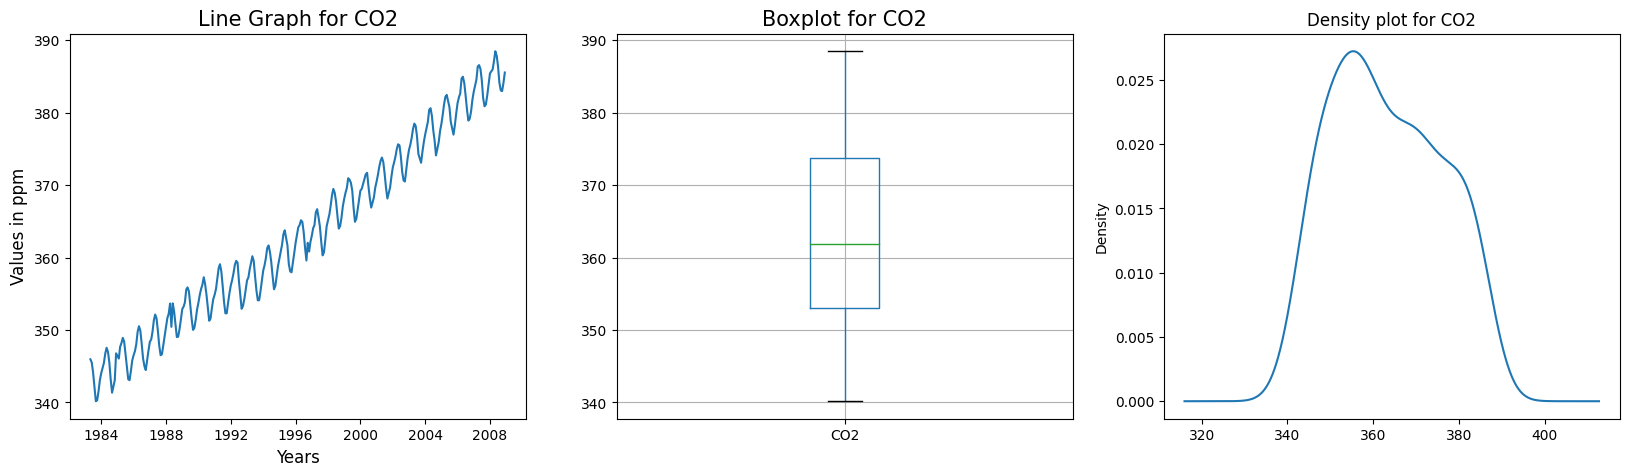

In [ ]:
plt.subplot(1,3,1)
plt.plot(df.Date_Time, df.CO2)
plt.title("Line Graph for CO2", fontsize=15)
plt.xlabel("Years", fontsize=12)
plt.ylabel("Values in ppm", fontsize=12)
# df.set_index('Year', inplace=True)
# df['CO2'].rolling(window=1).mean().plot()
# df = df.reset_index()

plt.subplot(1,3,2)
df[["CO2"]].boxplot()
plt.title("Boxplot for CO2", fontsize=15)

plt.subplot(1,3,3)
df["CO2"].plot.kde()
plt.title('Density plot for CO2')

From the line graph, we can see that CO2 has an **upward rising trend** from 345.96 in 1983 to 387.50 in 2008 with a substantial degree. This could be attributed to increase in human activities and temperature that leads to the rise in CO2. It has a mean value of 363.27 and the density plot also shows that it is **slightly right skewed**.

From the boxplot, the median value of 361.905 and interquartile range are slightly closer to the minimum of 340.17 than to the maximum of 388.50. This supports the slightly right skewed results in the density plot.


Notably, looking individually into the years, it is observed that CO2 fluctuates depending on the quarter of the year it is in. We will decompose the line graph into the average CO2 against the different quarters (seasonal) into the histogram graph shown below.

Text(0, 0.5, 'Values in ppm')

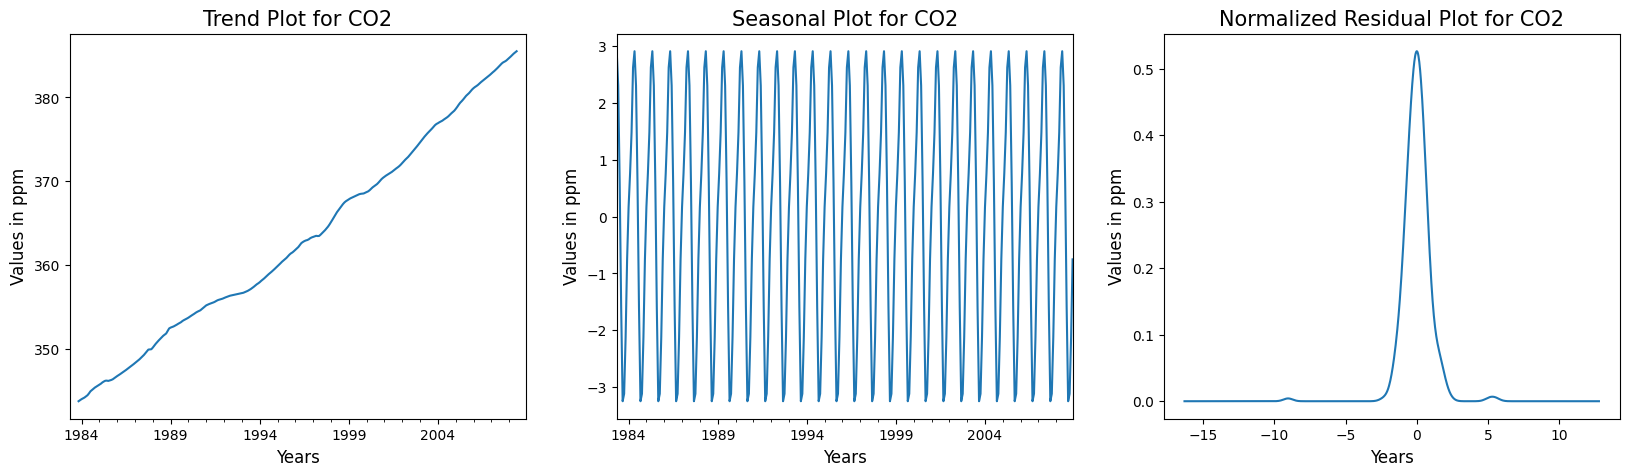

In [ ]:



df_co2_temp = df[['Date_Time','CO2']]
df_co2_temp.set_index('Date_Time', inplace=True)
df_seasonal =seasonal_decompose(df_co2_temp['CO2'], model='additive', period=12)

plt.rcParams['figure.figsize'] = [20, 5] #Setting size for plts
plt.subplot(1,3,1)
df_seasonal.trend.plot()
plt.title("Trend Plot for CO2", fontsize=15)
plt.xlabel("Years", fontsize=12)
plt.ylabel("Values in ppm", fontsize=12)
plt.subplot(1,3,2)
df_seasonal.seasonal.plot()
plt.title("Seasonal Plot for CO2", fontsize=15)
plt.xlabel("Years", fontsize=12)
plt.ylabel("Values in ppm", fontsize=12)
plt.subplot(1,3,3)
normalized_resid=(df_seasonal.resid-df_seasonal.resid.mean())/df_seasonal.resid.std()
normalized_resid.plot.kde()

plt.title("Normalized Residual Plot for CO2", fontsize=15)
plt.xlabel("Years", fontsize=12)
plt.ylabel("Values in ppm", fontsize=12)
# df_seasonal.plot()

For our seasonal models, we use a additive model as CO2 the fluctuation in the data is does not seem to increase over time.

As before mentioned, the trend plot proves that there is a linear upward rising trend in CO2 from 1983 to 2008.

From the seasonal plot, it is evident that **there is seasonality** in the data, with **CO2 fluctuating by 1 over the course of a year**. This makes sense intuitively as there are different seasons such as summer and winter throughout the years which affect the plants' photosynthesis and respiration, which contributes to these cyclic pattern.

Lastly, the density of the residual plot shows that the seasonal decomposition produced an residuals that follow a normal distribution. As this decomposition assumes that the residuals after the decomposition will be normally distributed, this decomposition is valid.

#### **(iii) CH4**

Text(0.5, 1.0, 'Density plot for CH4')

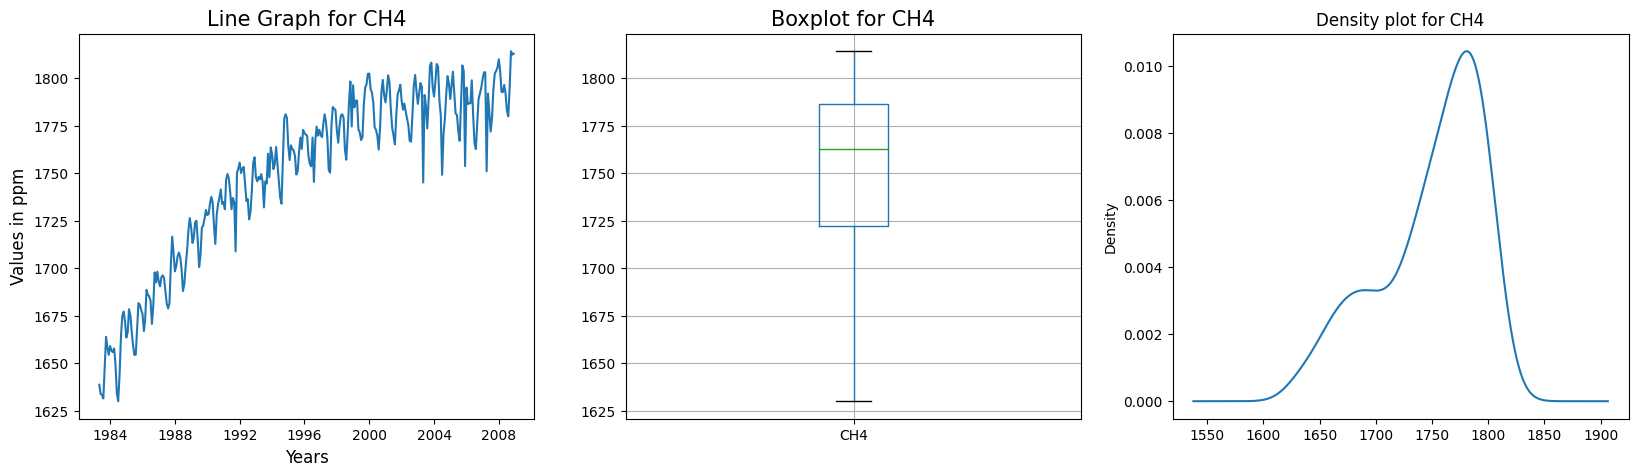

In [ ]:
plt.subplot(1,3,1)
plt.plot(df.Date_Time, df.CH4)
plt.title("Line Graph for CH4", fontsize=15)
plt.xlabel("Years", fontsize=12)
plt.ylabel("Values in ppm", fontsize=12)

plt.subplot(1,3,2)
df[["CH4"]].boxplot()
plt.title("Boxplot for CH4", fontsize=15)

plt.subplot(1,3,3)
df["CH4"].plot.kde()
plt.title('Density plot for CH4')

From the line graph, we can see that CH4 has **continuously fluctuated** throughout the years from 1984 to 2008, however, it generally shows an increasing trend throughout the years. From the density plot, we can see that it is **left skewed**, further proven by its mean value of 1749.03 being higher than the median value of 1762.36.

From the boxplot, the median value of 1762.69 and interquartile range are slightly closer to the maximum of 1851.23 than to the minimum of 1631.35. This supports the left skewed results in the density plot.


#### **(iv) CFC-11**

Text(0.5, 1.0, 'Density plot for CFC-11')

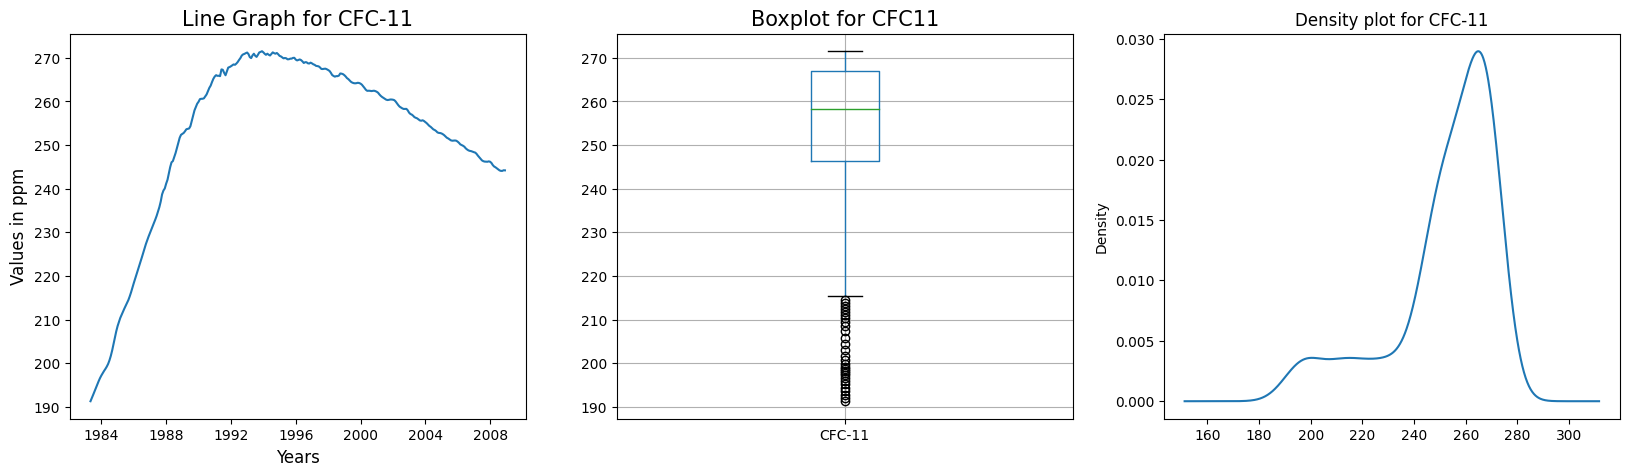

In [ ]:
plt.subplot(1,3,1)
plt.plot(df.Date_Time, df['CFC-11'])
plt.title("Line Graph for CFC-11", fontsize=15)
plt.xlabel("Years", fontsize=12)
plt.ylabel("Values in ppm", fontsize=12)

plt.subplot(1,3,2)
df[["CFC-11"]].boxplot()
plt.title("Boxplot for CFC11", fontsize=15)

plt.subplot(1,3,3)
df["CFC-11"].plot.kde()
plt.title('Density plot for CFC-11')

From the line graph, we can see that CFC-11 has an **upward rising trend** from year 1984 to year 1994 with a substantial degree. It then **decreases gradually** from 1994 onwards. It has a mean value of 251.97 and the density plot also shows that it is **left skewed**.

From the boxplot, the median value of 258.344 and interquartile range are significantly closer to the maximum of 271.494 than to the minimum of 191.324. This supports the negatively skewed results in the density plot.

The boxplot also shows many notable points, especially near the lowest point of 190. This is also reflected in the line graph between years 1983 and 1986, and supports the trends shown in the line graph.

#### **(v) CFC-12**

Text(0.5, 1.0, 'Density plot for CFC-12')

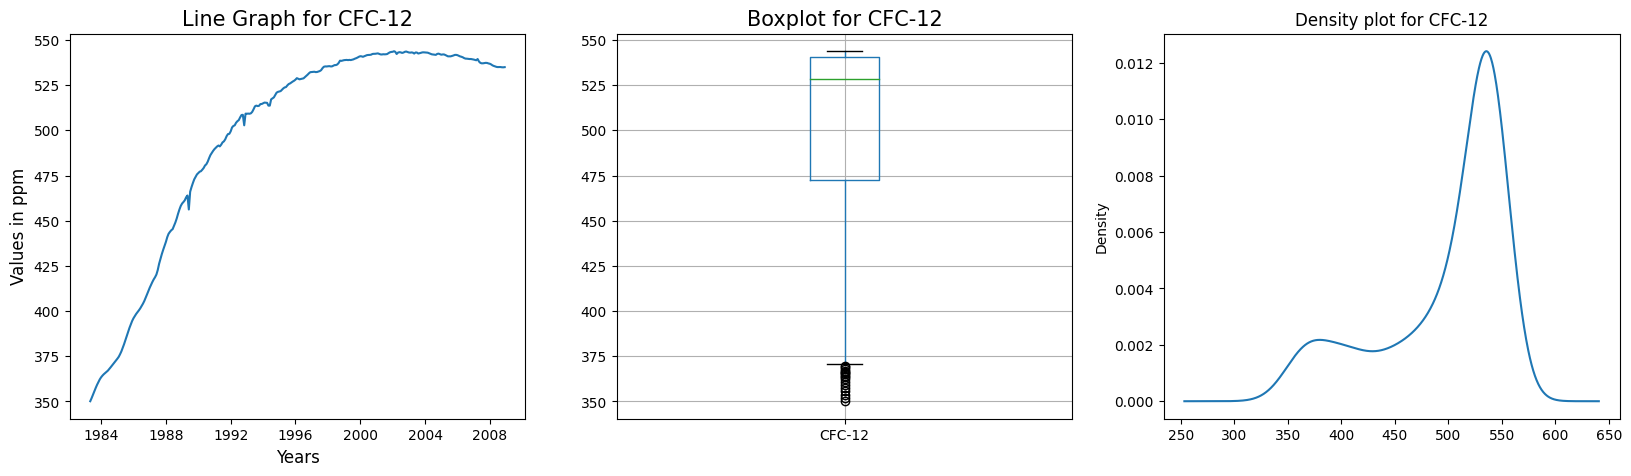

In [ ]:
plt.subplot(1,3,1)
plt.plot(df.Date_Time, df['CFC-12'])
plt.title("Line Graph for CFC-12", fontsize=15)
plt.xlabel("Years", fontsize=12)
plt.ylabel("Values in ppm", fontsize=12)

plt.subplot(1,3,2)
df[["CFC-12"]].boxplot()
plt.title("Boxplot for CFC-12", fontsize=15)

plt.subplot(1,3,3)
df["CFC-12"].plot.kde()
plt.title('Density plot for CFC-12')

From the line graph, we can see that CFC-12 has an **upward rising trend** from year 1984 to year 2001 at a decreasing rate. It then **decreases slightly** from 1994 onwards. It has a mean value of 497.47 and the density plot also shows that it is **negatively skewed**.

From the boxplot, the median value of 528.356 and interquartile range are significantly closer to the maximum of 543.813 than to the minimum of 350.113. This supports the negatively skewed results in the density plot where there are more data points in the upper quartile, which supports the upward rising trend in the line graph.

The boxplot also shows a few notable points especially near the lowest point of 350. This is also reflected in the line graph between years 1983 and 1985 and supports the trends shown in the line graph.

#### **(vi) Temp**

Text(0.5, 1.0, 'Density plot for Temp Difference')

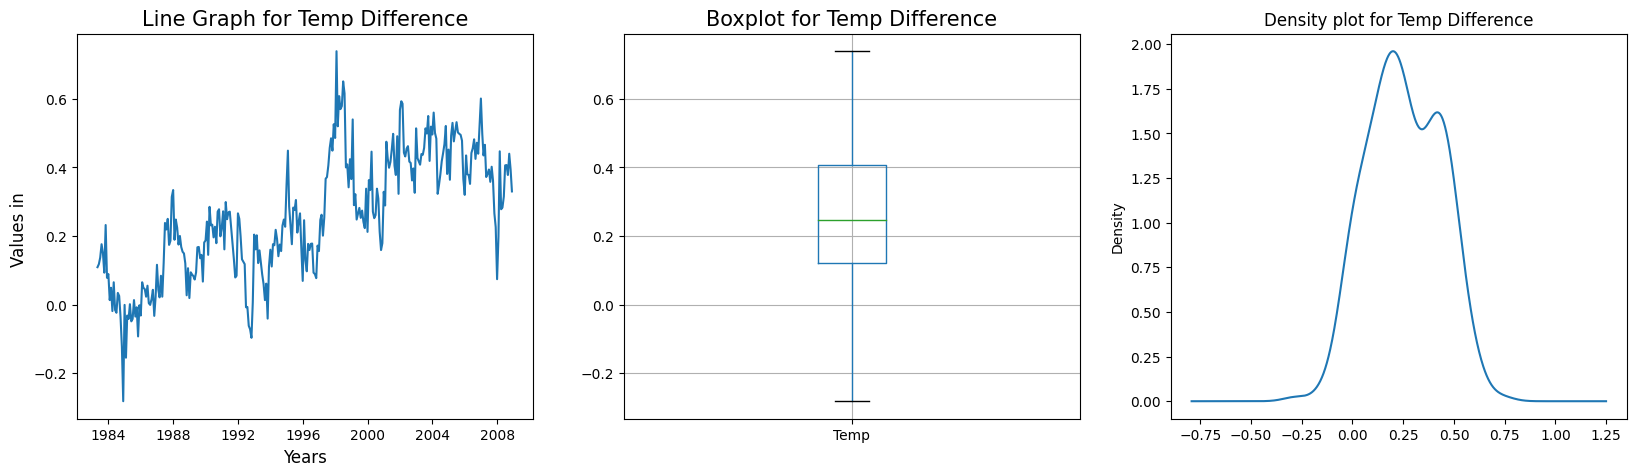

In [ ]:
plt.subplot(1,3,1)
plt.plot(df.Date_Time, df["Temp"])
plt.title("Line Graph for Temp Difference", fontsize=15)
plt.xlabel("Years", fontsize=12)
plt.ylabel("Values in ", fontsize=12)

plt.subplot(1,3,2)
df[["Temp"]].boxplot()
plt.title("Boxplot for Temp Difference", fontsize=15)

plt.subplot(1,3,3)
df["Temp"].plot.kde()
plt.title('Density plot for Temp Difference')

From the line graph, we can see that temperature difference has **continuously fluctuated** throughout the years from 1984 to 2008, however, it generally shows an increasing trend throughout the years. Its values tend to lean towards the positive side, having a mean value of 0.2548, being greater than 0, indicating that the temperature tends to increase by an average 0.2.

From the boxplot, the median value of 0.248 and interquartile range are slightly closer to the minimum of -0.097 than to the maximum of 0.739. This supports the positively skewed results in the density plot and the generally upward trend in the line graph.

### Univariate Visualisation for Categorical Dataset

#### **(i) N2O analysis**

Text(0, 0.5, 'Percentage')

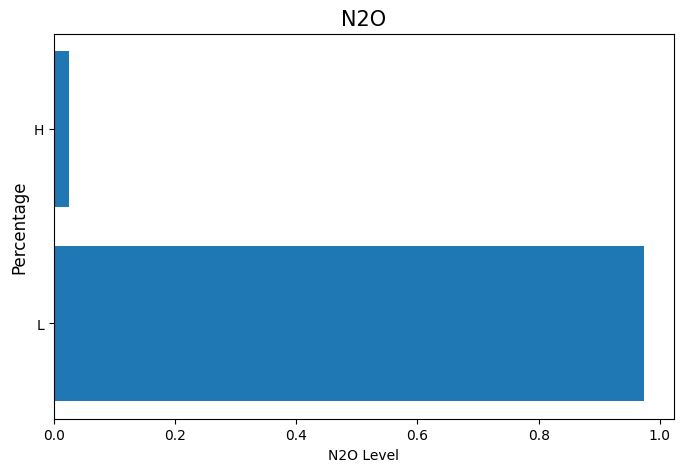

In [ ]:
data = df["N2O"].value_counts(normalize = True)
xs = data.index
ys = data

plt.figure(figsize=(8,5))
plt.barh(xs, ys)
plt.title("N2O", fontsize=15)
plt.xlabel("N2O Level")
plt.ylabel("Percentage", fontsize=12)

**Key Observations:**

According to the bar plot, a **majority of the dataset have the value of L** for the variable `N2O`. From the data dictionary, this suggests that a majority of the data are collected in times when the level of atmospheric concentration of nitrous oxide is low.

#### **(ii) TSI analysis**

Text(0, 0.5, 'TSI level')

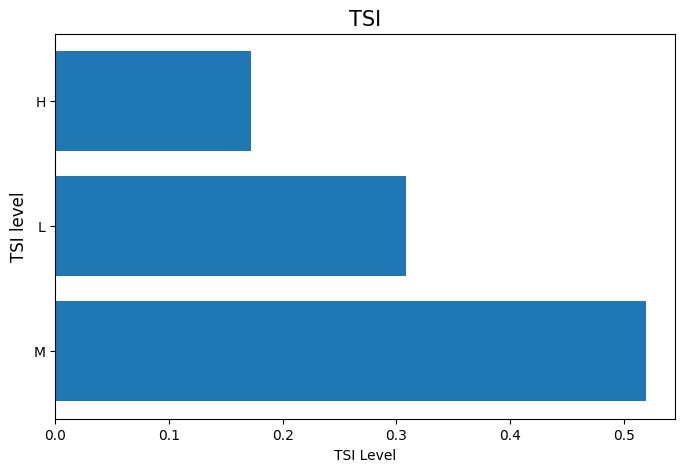

In [ ]:
data = df["TSI"].value_counts(normalize = True)

xs = data.index
ys = data

plt.figure(figsize=(8,5))
plt.barh(xs, ys)
plt.title("TSI", fontsize=15)
plt.xlabel("TSI Level")
plt.ylabel("TSI level", fontsize=12)

**Key Observations:**

According to the bar plot, a **majority of the dataset have the value of M** for the variable `TSI`. From the data dictionary, this suggests that a majority of the data are collected in times when the rate at which sun's energy is deposited per unit area is medium.

#### **(iii) Aerosols analysis**

Text(0, 0.5, 'Aerosols Level')

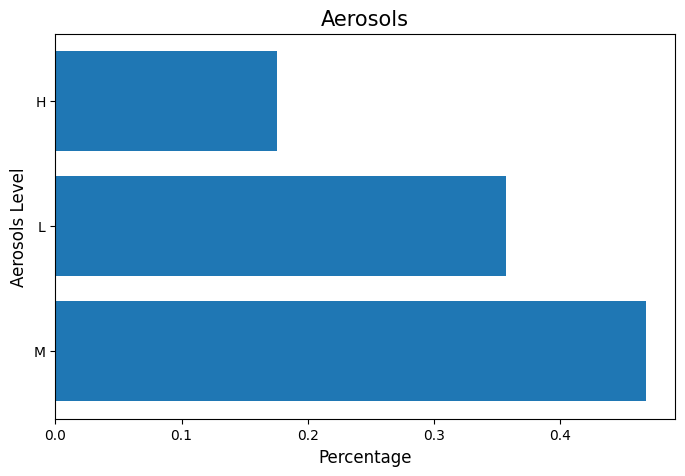

In [ ]:
data = df["Aerosols"].value_counts(normalize = True)

xs = data.index
ys = data

plt.figure(figsize=(8,5))
plt.barh(xs ,ys )
plt.title("Aerosols", fontsize=15)
plt.xlabel("Percentage", fontsize=12)
plt.ylabel("Aerosols Level", fontsize=12)

**Key Observations:**

According to the bar plot, a **majority of the dataset have the value of M** for the variable `Aerosols`. From the data dictionary, this suggests that a majority of the data are collected in times when the level of stratospheric “aerosol optical depth” at 550nm is medium.

### Bivariate Analysis

**c.** Perform bi-variate analysis on the variables. You do not need to present the analysis of every pair of variables; only focus on the pairs you believe are worth investigating and explain. For each pair, describe the relationship between the two variables. Use appropriate statistical methods and/or visualizations.

**Response.**

Aerosols influence Earth's climate both directly, by scattering and absorbing sunlight, and indirectly, by altering the reflectivity of clouds. In general, aerosols have a cooling effect on climate, which partially counterbalances the heating effect of greenhouse gases.

While TSI measures the amount of solar radiation received by the Earth's atmosphere and surface.

It is not a stretch to hypothesize that Aerosols and TSI are both dependent since one could affect the other. As such, we decided to look at whether these 2 variables are dependent.

In [ ]:
table = pd.crosstab(df.Aerosols, df.TSI)
TSI_H = table["H"]["L"] + table["H"]["H"] + table["H"]["M"]
TSI = 308
A_low = table["H"]["L"] + table["M"]["L"] + table["L"]["L"]
A_mid = table["H"]["M"] + table["M"]["M"] + table["L"]["M"]
A_high = table["H"]["H"] + table["M"]["H"] + table["L"]["H"]


p1 = TSI_H/TSI
p2 = table["H"]["L"]/A_low
p3 = table["H"]["M"]/A_mid
p4 = table["H"]["H"]/A_high

print(f"P(TSI=H) : {p1}")
print(f"P(TSI=H|A=L) : {p2}")
print(f"P(TSI=H|A=M) : {p3}")
print(f"P(TSI=H|A=H) : {p4}")


P(TSI=H) : 0.17207792207792208
P(TSI=H|A=L) : 0.2545454545454545
P(TSI=H|A=M) : 0.13194444444444445
P(TSI=H|A=H) : 0.1111111111111111


Since P(TSI=H) is not equal to P(TSI = H | A=L),we hypothesise that TSI and Aerosols are both dependent random variables. Below, we have provided a table indicating the probabilities associated with each TSI values given an Aerosol value.

In [ ]:
norm_table = pd.crosstab(df.Aerosols, df.TSI, normalize='index')
norm_table

TSI,H,L,M
Aerosols,,,
H,0.111111,0.166667,0.722222
L,0.254545,0.081818,0.663636
M,0.131944,0.534722,0.333333


<Axes: xlabel='Aerosols'>

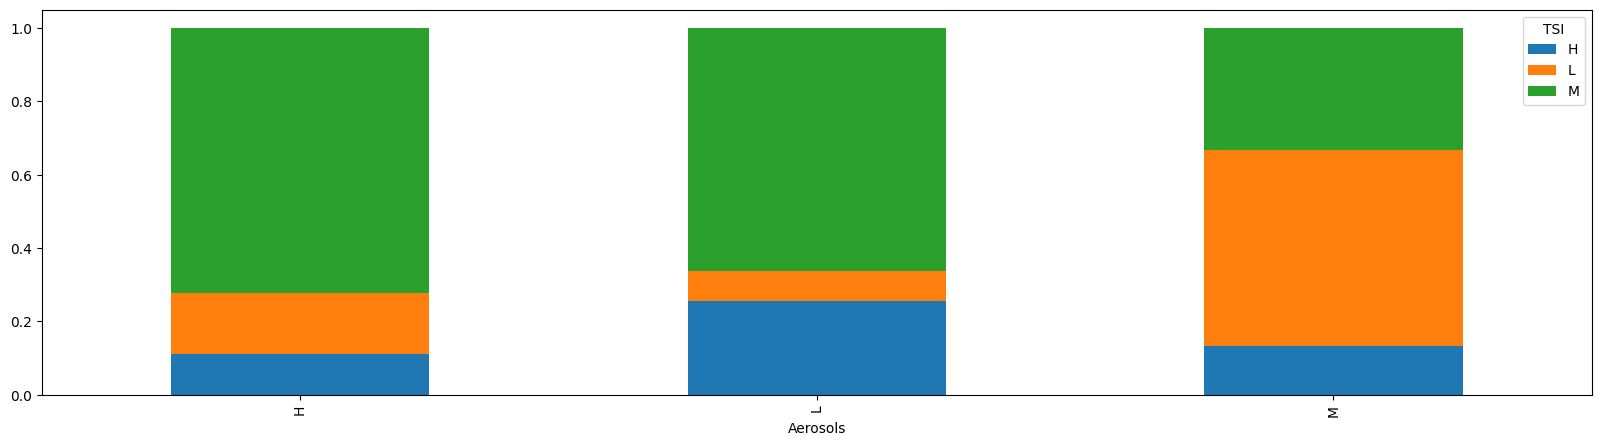

In [ ]:
norm_table.plot.bar(stacked=True)

Visually, it appears that the TSI and Aerosols are statistically dependent. We then choose to run a chi square test at the 95% significance level in order to further confirm our assertion. The null hypothesis is that TSI and Aerosols are independent.


In [ ]:
norm_table = pd.crosstab(df.Aerosols, df.TSI)
norm_table #contingency table for chi square test

TSI,H,L,M
Aerosols,,,
H,6,9,39
L,28,9,73
M,19,77,48


In [ ]:
from scipy.stats import chi2_contingency

c, p, dof, expected = chi2_contingency(norm_table)
p

1.4798857372818306e-14

When we run a chi square test, the p value obtained is 1.4798857372818306e-14, which is less than 0.05, hence we reject the null hypothesis at the 95% significance level. Thus, TSI and Aerosols are statistically dependent.

### Bivariate Analysis of Numerical Data


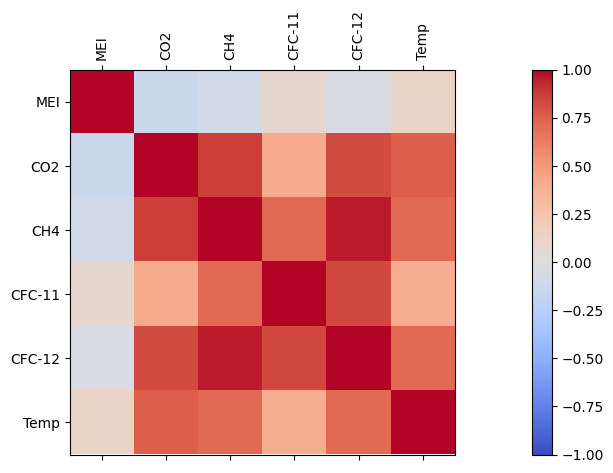

             MEI       CO2       CH4    CFC-11    CFC-12      Temp
MEI     1.000000 -0.130717 -0.081662  0.078709 -0.035224  0.121198
CO2    -0.130717  1.000000  0.862965  0.399887  0.823430  0.757383
CH4    -0.081662  0.862965  1.000000  0.716320  0.955313  0.708385
CFC-11  0.078709  0.399887  0.716320  1.000000  0.830578  0.391068
CFC-12 -0.035224  0.823430  0.955313  0.830578  1.000000  0.705128
Temp    0.121198  0.757383  0.708385  0.391068  0.705128  1.000000


In [ ]:
df1 = df.copy()
df1.drop(["Year","Month","N2O","TSI","Aerosols","date","Date_Time","TSI_Encoding", "N2O_Encoding", "Aerosols_encoding"], axis=1, inplace=True)

corr = df1.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df1.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df1.columns)
ax.set_yticklabels(df1.columns)
plt.show()
print(corr)

Before deciding on which pairs of variables we wish to focus on, we **plotted a corrrelation matrix** in order to determine the correlation coefficient between each variable to **summarize a large amount of data in order to see the overall patterns**. Following the convention, we define any **r value that is more than 0.6 and less than -0.6 to be a strong positive and a strong negative relationship respectively**. For our dependent variable, `Temp`, it seems to suggest a strong positive relationship with `CO2`, `CH4` as well as `CFC-12`. We will be focusing on the analysis of these variables.

Additionally, as mentioned previously, we also found like to further investigate the relationship of both variables `CO2` and `CFC-12` with `CH4`, since we found the extremely strong correlation interesting and would like to provide further analysis on it.

However, it is important to note the following **disadvantages** of using correlation coefficient.

1. **Correlation does not always prove causation**, as a third variable may be involved. Causation means that one variable (the independent variable) causes the other (dependent variable, in this case, Temp). Meanwhile, a correlation between variables, does not automatically mean that the change in one variable is the cause of the change in the values of the other variable. A correlation only shows if there is a relationship between variables.

2. Correlation coefficient r only shows if there is a **linear relationship** between 2 variables. In other words, some variables **may have a non-linear relationship** with `Temp`, but may not be reflected as a strong relationship in terms of the r value.

#### **(i) CO2 vs Temperature, CH4 vs Temperature, and CFC-12 vs Temperature**

We decided to explore these relationships due to their high correlation coefficients. Furthermore, CO2, CH4 and CFC-12 are often reported as some of the main greenhouse gases, which contributes to global warming by acting as a blanket that insulates, absorbs energy and slows the rate of heat leaving the Earth. As such, we wanted to further explore these relationship.

**Hypothesis:** As the concentrations of CO2, CH4 and/or CFC-12 increases, the temperature increases as well.

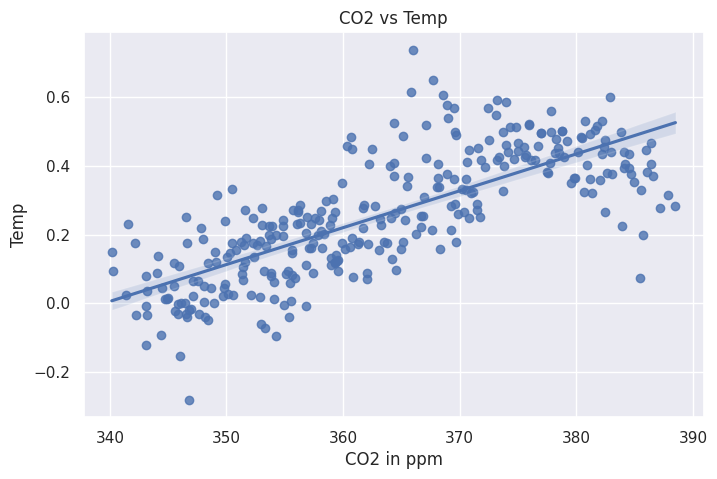

In [ ]:
sms.set_theme(color_codes=True)
plt.figure(figsize=(8,5))
ax = sms.regplot(x = "CO2", y ="Temp", data = df)
ax.set(xlabel ='CO2 in ppm', ylabel ='Temp')
plt.title('CO2 vs Temp');
plt.show()

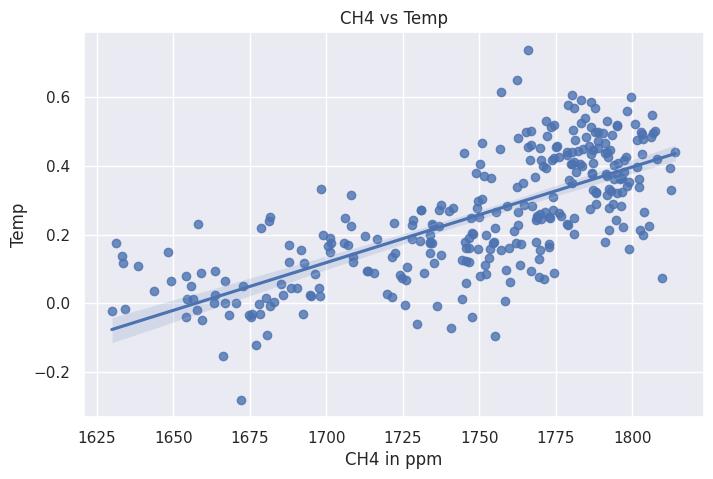

In [ ]:
sms.set_theme(color_codes=True)
plt.figure(figsize=(8,5))
ax = sms.regplot(x = "CH4", y ="Temp", data = df)
ax.set(xlabel ='CH4 in ppm', ylabel ='Temp')
plt.title('CH4 vs Temp');
plt.show()

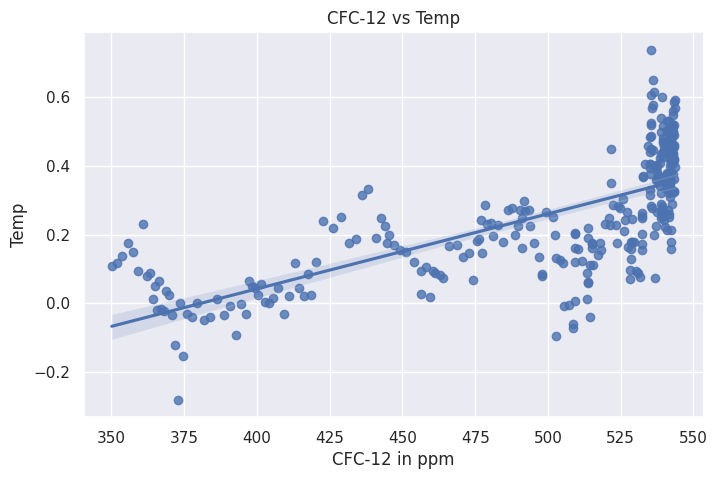

In [ ]:
sms.set_theme(color_codes=True)
plt.figure(figsize=(8,5))
ax = sms.regplot(x = "CFC-12", y ="Temp", data = df)
ax.set(xlabel ='CFC-12 in ppm', ylabel ='Temp')
plt.title('CFC-12 vs Temp');
plt.show()

From the correlation coefficients as well as the scatter plots, we can see that there is a strong linear correlation between the concentration of green house gasses and temperature.

#### **(ii) CO2 vs CH4 and CFC-12 vs CH4**

We found the extremely strong correlation between the CO2 and CH4, as well as CFC-12 and CH4 interesting, as to our knowledge, there shouldn't be a direct causal link between the concentration levels of these gases.

Therefore, we decided to plot their graphs to see if the data points show siginificant correlation.

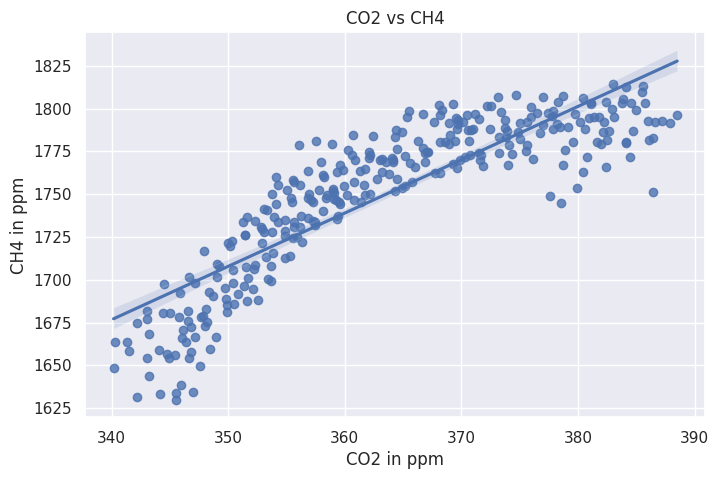

In [ ]:
sms.set_theme(color_codes=True)
plt.figure(figsize=(8,5))
ax = sms.regplot(x = "CO2", y ="CH4", data = df)
ax.set(xlabel ='CO2 in ppm', ylabel ='CH4 in ppm')
plt.title('CO2 vs CH4');
plt.show()

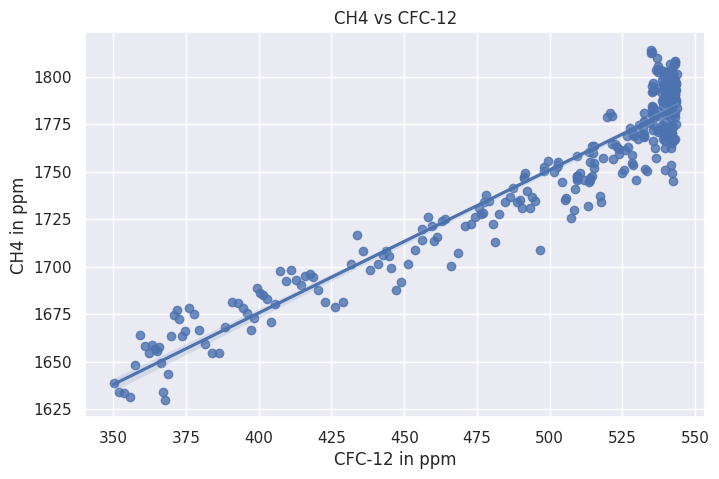

In [ ]:
sms.set_theme(color_codes=True)
plt.figure(figsize=(8,5))
ax = sms.regplot(x = "CFC-12", y ="CH4", data = df)
ax.set(xlabel ='CFC-12 in ppm', ylabel ='CH4 in ppm')
plt.title('CH4 vs CFC-12');
plt.show()

As we can see, both sets of variables show significant positive correlation. However, we believe that it would be naive to assume that there is a causal relation between the these variables.

We believe that we observe this extremely strong correlation due to a spurrious correlation, where the observed correlation occurs due to a confounding third variable. Indeed, this is quite common when dealing with time series data, like the climate dataset that we are currently working with. In this case, CH4, CFC-12 and CO2 are all strongly correlated by time, as we can see from the earlier line graphs as well as their correlation coefficients.

Given the broadness of the context of how CH4 can be related to CO2, as well as CFC-12, we do not see a possible way to propose a mechanism to suggest causality between the two variables.

In [ ]:
df2 = df.reset_index()
print(df2.corr().loc['CH4' , 'index'])
print(df2.corr().loc["CFC-12" , "index"])
print(df2.corr().loc["CO2" , "index"])

0.9036364702091398
0.8707853335923212
0.9824530659874766


<ipython-input-55-ef81de5d2d97>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df2.corr().loc['CH4' , 'index'])
<ipython-input-55-ef81de5d2d97>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df2.corr().loc["CFC-12" , "index"])
<ipython-input-55-ef81de5d2d97>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df2.corr().loc["CO2" , "index"])


Therefore, the strong correlations between the concentrations of gases are not worth examining in a regression model, as they are often caused by a third confounding variable.

### Bivariate Analysis of Numerical & Categorical Data

#### **(i) Temp vs N2O**

N2O is another greenhouse gas that we decided to examine in relation to Temperature. Similar to the section above, we believe that this is worth exploring since N2O is known to trap heat in earth's atmosphere. Thus, our hypothesis is that as N20 increases, the average global temperature increases. In other words, the relationship between N2O and Temp should be correlated, where higher N2O values correlate with higher temperature values.

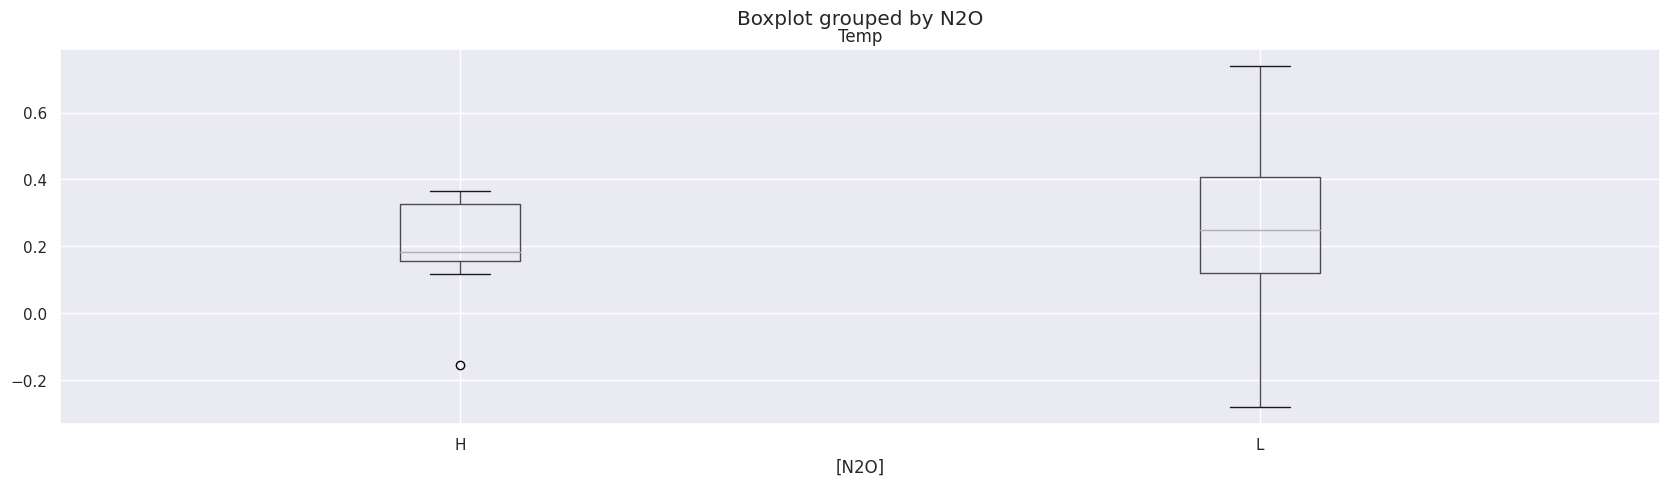

In [ ]:
df[['Temp', 'N2O']].boxplot(by='N2O')
plt.show()

Based on the grouped boxplots above, the median `Temp` for data with `N2O` at L is higher than that with `N2O` at H which seemingly proves our hypothesis true.

However, Boxplot L's box is longer than boxplot H's box which suggests that it boxplot L has a larger interquartile range. Boxplot L also has significantly longer whiskers with maximum and minimum values far exceeding that of Boxplot H.

This shows that the `Temp` range for L is significantly larger than that of H. Also, the top and bottom of the box of Boxplot L being higher and lower than boxplot H respectively goes against our hypothesis that as N2O and temperature are directly correlated.    

Upon closer examination of N2O, we found that the frequency of "L" far exceeds that of "H" as indicated in the code section below. With the current dataset, we cannot make any concrete conclusions as to the relationship between N2O and temperature.

In [ ]:
df["N2O"].value_counts()

L    300
H      8
Name: N2O, dtype: int64

#### **(ii) Temp & MEI vs Aerosol**

Here, we examined the relationship between the Aerosol-temperature pair. Aerosol is known to affect the climate by scattering and abosrbing sunlight, which means it could potentially influence changes in temperature. We wanted to find if there were any correlation in values between these 2 variables.

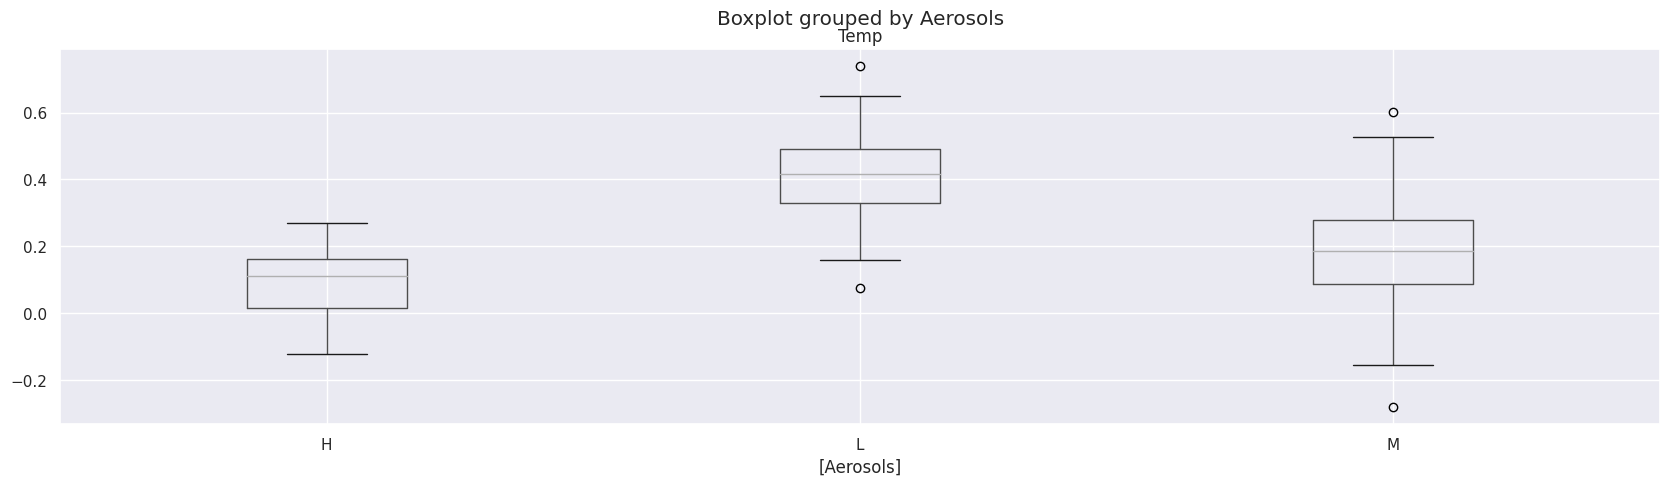

In [ ]:
df[['Temp', 'Aerosols']].boxplot(by='Aerosols')
plt.show()

Based on the grouped boxplot above, the median `Temp` for data with `Aerosols` at L is the highest, followed by that with `Aerosols` M and H.

The whiskers of boxplot M is the longest as its maximum value and minimum value extends past all the other boxplots.

Boxplot L is placed higher than the other box plots and it also has the highest median. This suggests that the `Temp` dataset at boxplot L is higher than the rest of the `Temp` dataset at other boxplots

Also, boxplot H box is placed at the lowest height among the boxplots which indicates that Temp datasets with high Aerosols tend to be low temp values.

Conversely, the opposite applies to boxplot L of which box is placed highest among the other boxplot.

This all suggests that Aerosols have an inverse correlation with Temperature where higher Aerosols values tend to correlate with lower temperature values.

We also note that the median temperature values at medium and high aerosol levels are very similar.

Hence, we could consider using a one hot encoding for aerosols instead, with low levels of aerosols being encoded as 0 and everything else as 1, as medium and high levels of aerosols is correlated to similar temperature levels.


#### **(iii) Aerosols vs MEI**

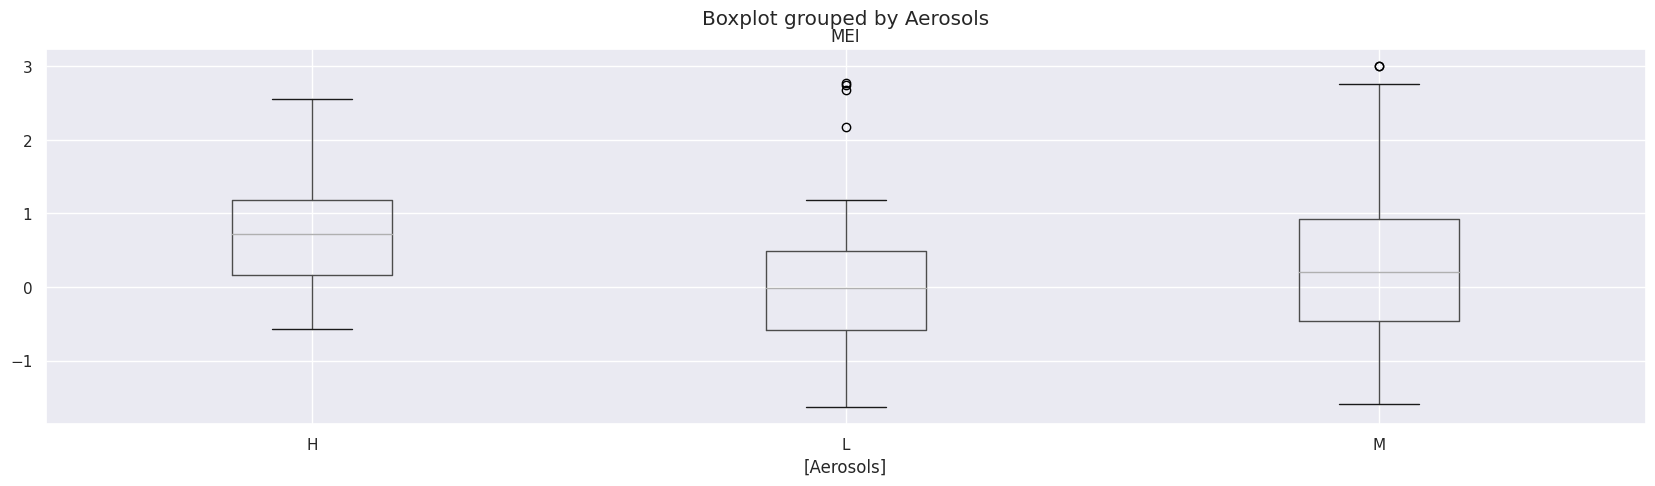

In [ ]:
df[['MEI', 'Aerosols']].boxplot(by='Aerosols')
plt.show()

Based on the grouped boxplot above, the median `MEI` for data with `Aerosols` at H is the highest, followed by boxplot with `Aerosols`at M and then boxplot with `Aersosols` at L.

The boxplot displays the interquartile range with boxplot M having the biggest range followed by L and H. The whiskers of boxplot M is the longest as its maximum value extends past all the other boxplots.

Since boxplot H is placed higher than and boxplot H median is highest among the box plots, it suggests that the MEI values tend to be higher when Aerosols are high.   

Conversely, box plot L is placed lower than other box plots, it also contains the lower median. This could suggest that Aerosol and MEI values are correlated such that the high concentration of Aerosols are correlated with higher MEI values.

However, visually, there does not seem to be a significant difference in the median of the three different boxplots. Hence, this pair of variables might not be suitable for classification models.


### Trivariate analysis with two independent variables and one dependent variable

#### **(i) CH4 and CO2 vs Temp**
We decided to further explore the relationship between `CO2` and `CH4` and `Temperature`. We believe that this is worth exploring as we know that CO2 and CH4 are greenhouse gases that trap heat in earth's atmosphere. Thus our hypothesis is that as CH4 and CO2 increases, the average global temperature increases.

We then calculate the correlation coefficient of Temperature vs CO2 and CH4.

In [ ]:
x = 'CH4'
y = 'CO2'
z = 'Temp'

xz = corr.loc[x , z]
xy = corr.loc[x , y]
yz = corr.loc[y , z]

Rxyz = math.sqrt((abs(xz**2) + abs(yz**2) - 2*xz*yz*xy) / (1-abs(xy**2)) )
R2 = Rxyz**2

# Calculate adjusted R-squared
n = len(df) # Number of rows
k = 2       # Number of independent variables
R2_adj = 1 - ( ((1-R2)*(n-1)) / (n-k-1) )

print(R2)
print(R2_adj)

0.585387950250257
0.5826691827109145


As it is less than 0.6, we can see that there is a weak positive linear correlation between the two independent variables, `CO2` and `CH4`, and the dependent variable `Temperature`. We then plot a scatter plot to verify our assertion.

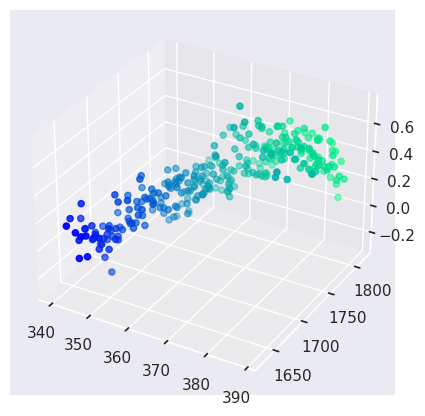

In [ ]:
ax = plt.axes(projection='3d')
color_map = plt.get_cmap('winter')
scatter_plot = ax.scatter(df.CO2, df.CH4, df.Temp, c=df.CO2 + df.CH4, cmap=color_map)

We also made the data points change colour from blue to green as CH4 and CO2 increases.

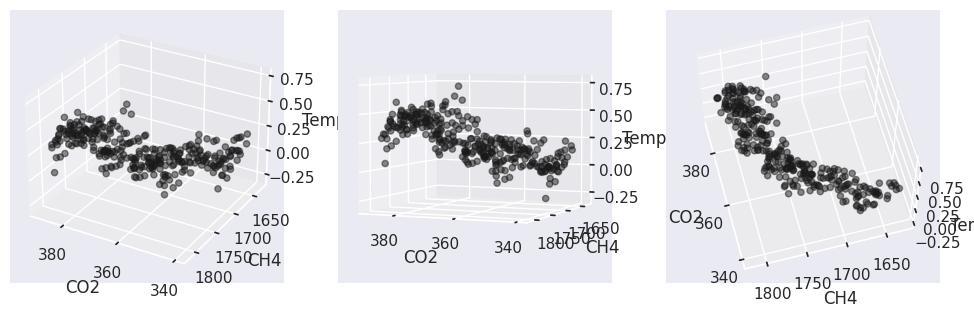

In [ ]:
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]
for ax in axes:
    ax.scatter(df.CO2, df.CH4, df.Temp, color='k', zorder=15, marker='o', alpha=0.5)
    #ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('CO2', fontsize=12)
    ax.set_ylabel('CH4', fontsize=12)
    ax.set_zlabel('Temp', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

Here we have a separate plot of the data from three different perspectives.

By visual inspection, we can see that the points are quite closely clustered together, despite the weak positive correlation. Thus, while a multiple linear regression model may not be a good fit, there might be other regression models that may have a better fit.

# Part II: Modeling [12% of final grade]

## 1. Problem formulation [15% of Part II]

**a.** Formulate one regression problem and one classification based on the dataset, in **no more than 50 words**.

**Response.**

1. **Regression**: Predict the average global temperature, a numerical variable, based on the other variables in the dataset.

2. **Classification**: Predict the TSI, a categorical variable, based on the other variables in the dataset.

**b.** State which problem (regression or classification) you would be investigating and why, in **no more than 20 words**.

**Response.**

**Regression**. Modelling the relationship between independent variables against temperature and predicting a continuous output for temperature is more meaningful.

**c.** Clearly specify the dependent variable you are predicting, and its significance, in **no more than 20 words**

**Response.**

The dependent variable is Temperature, as it is a crucial indicator of climate change.

## 2. Model training [30% of Part II]

**a.** Perform feature selection. For each variable, decide if you want to include it as a feature and provide a justification. You may leverage on your analysis in Part I: EDA and/or perform additional analysis.

**Response.**

We performed feature selection in order to:

1. Reduce Overfitting: Reduce redundant data so that decisions made would not be affected by noise.

2. Improve Accuracy: Less misleading data means modeling accuracy improves.
3. Reduce Training Time: Fewer data points reduce algorithm complexity and algorithms are trained faster.
    

We started the feature selection process by **splitting the categorial and numerical features** in the dataframe as shown below.

In [ ]:
datatypes = df.dtypes
print(datatypes)
categorical_features = datatypes[datatypes=="object"].index
categorical_features = categorical_features.drop(['date'])
numerical_features = datatypes[datatypes!="object"].index
categorical_features

Year                          int64
Month                         int64
MEI                         float64
CO2                         float64
CH4                         float64
N2O                          object
CFC-11                      float64
CFC-12                      float64
TSI                          object
Aerosols                     object
Temp                        float64
date                         object
Date_Time            datetime64[ns]
TSI_Encoding                  int64
Aerosols_encoding             int64
N2O_Encoding                  int64
dtype: object


Index(['N2O', 'TSI', 'Aerosols'], dtype='object')

### **Categorical Variables**

We have three categorical variables, which are `N2O`, `TSI`, and `Aerosols`. We plotted a histogram below in order to get a better understanding of the distribution of the data of each individual feature.

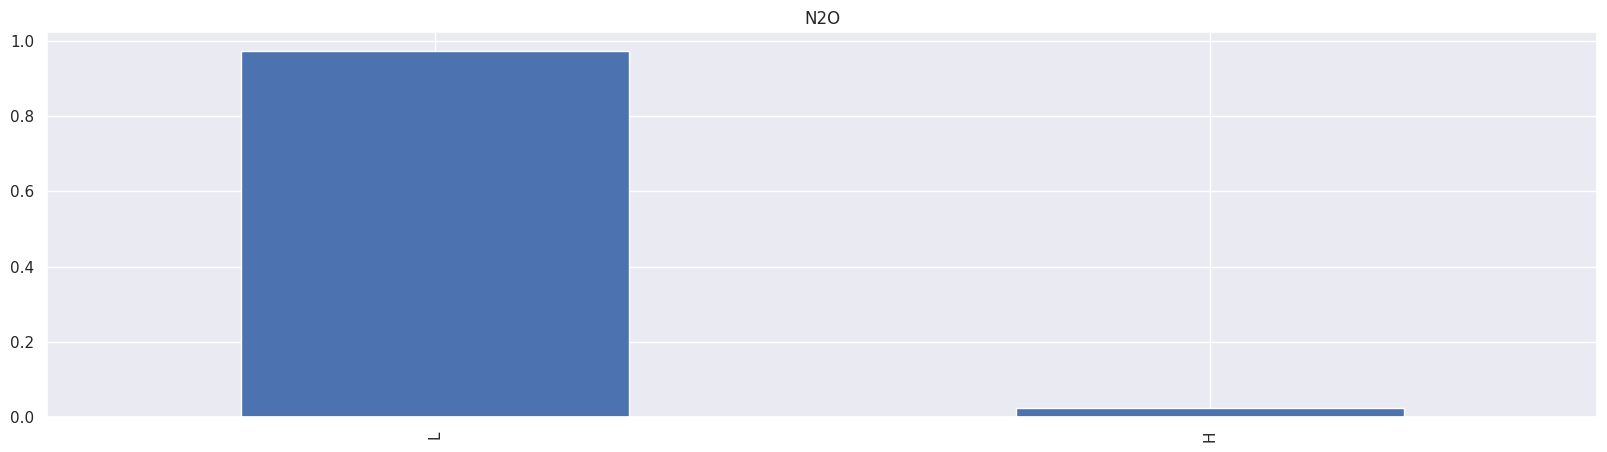

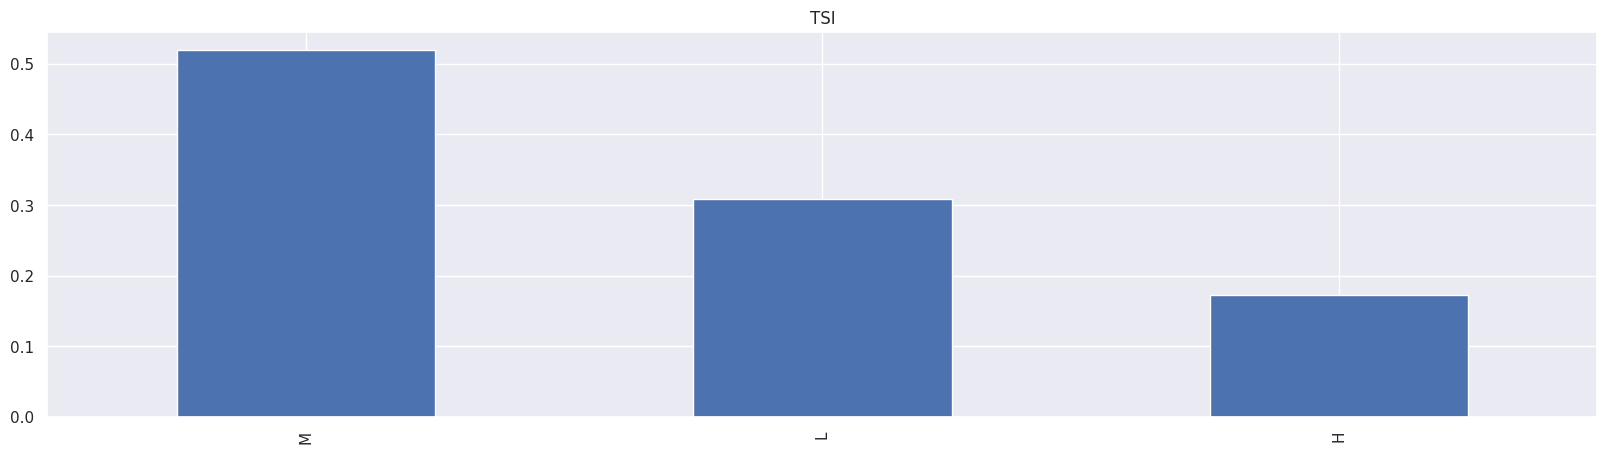

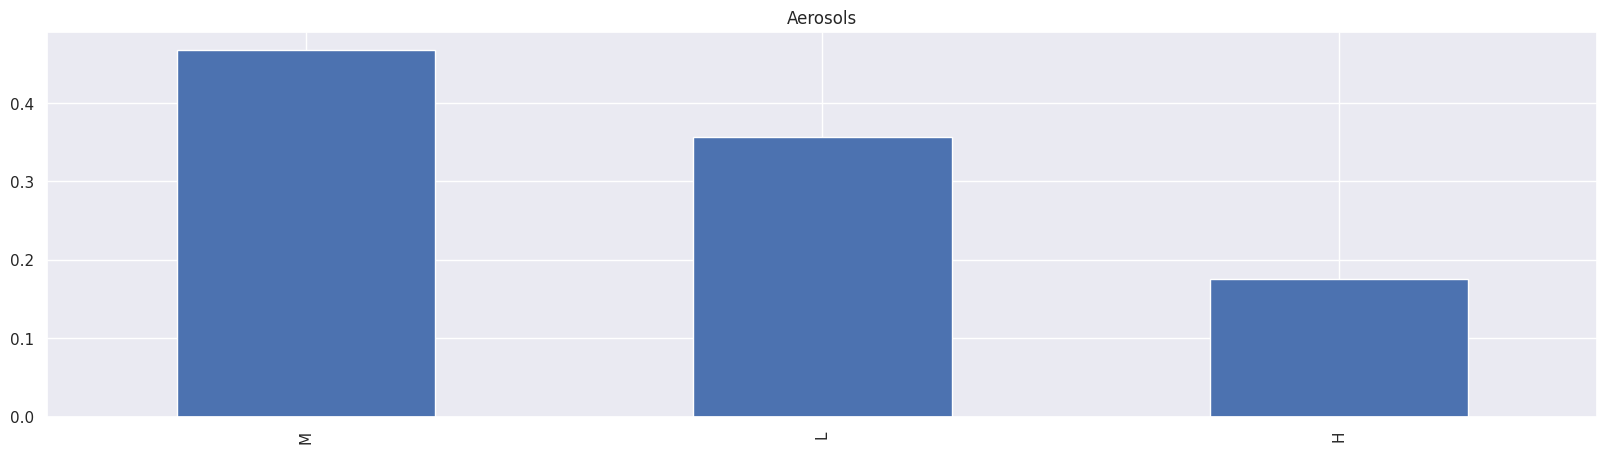

In [ ]:
for feature in categorical_features:
    df[feature].value_counts(normalize=True).plot(kind='bar')
    plt.title(feature)
    plt.show()

In [ ]:
categorical_important = []

for feature in categorical_features:
    highest = df[feature].value_counts(normalize=True)[0]
    if highest<0.5:
        categorical_important.append(feature)

print(f"Variables with mode contributing <50% are : {categorical_important}")

Variables with mode contributing <50% are : ['Aerosols']


Our criteria is that we will not select features that **have a mode frequency of more than 50%**.

From the graph above we observed that the `N2O` variable **has a dominant value, with a frequency of more then 50%**.`TSI` also **has a dominant value, with a frequency of more than 50%**. This means that they have a lack of variation, meaning that they are likely to have **little explanatory power** on the variation in `Temperature`. Hence we will not select these features, will select Aerosols only.

### **Numerical Variables**

Moving on to numerical variables, we want to select features so that they can be our attributes in our model later. We started off by plotting histograms for all the features.

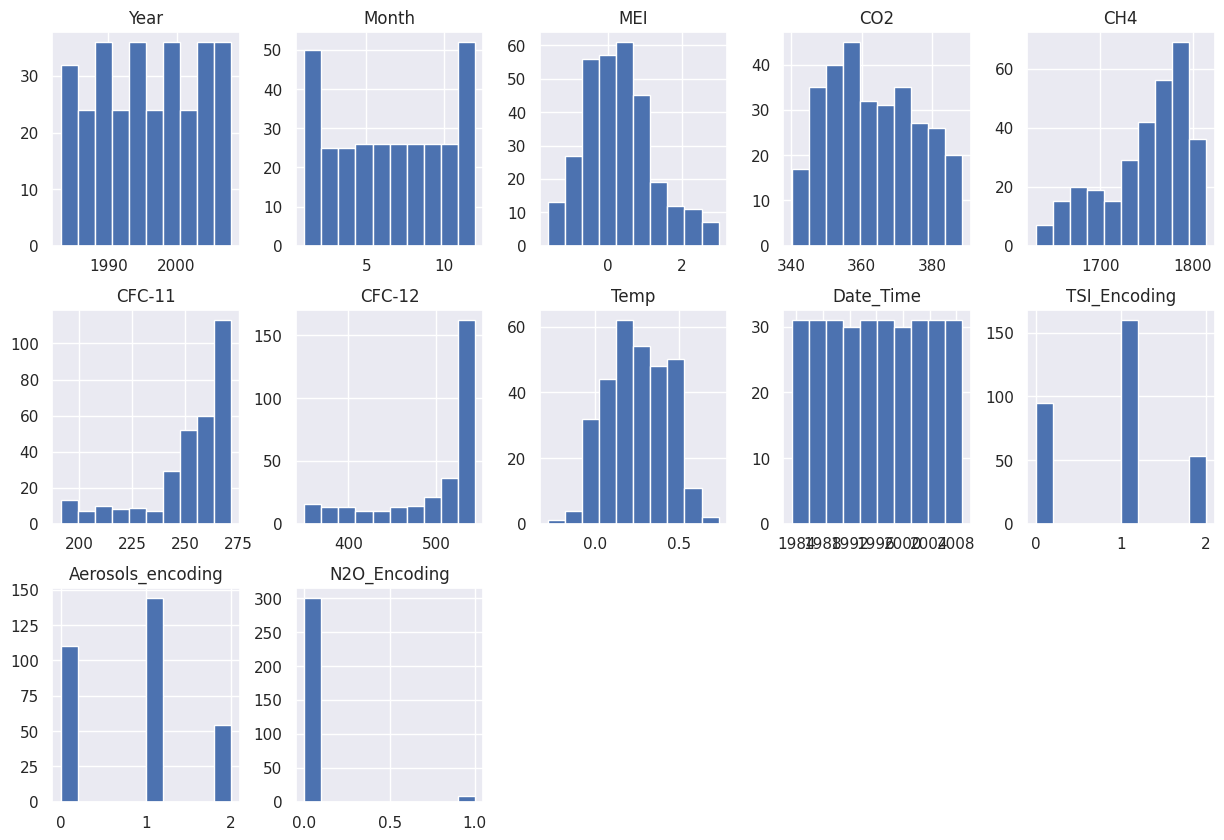

In [ ]:
df[numerical_features].hist(layout=(3,5), figsize=(15,10))

plt.show()

Based on a visual observation we noted the following:
1. The variables `Year`, `Month`, and `Date_Time` are **indices** and **would not have explanatory power** in explaining our dependent variable `Temperature`. Hence, we will not be using these variables.


2. There are variables which is **dominated by a small range of values**. Such variables include `CFC-12`, which will not be selected as there are **little variation** in these variables, hence it is less likely to explain the variation in `Temperature`.


3. `TSI_Encoding`, `Aerosols_encoding`, and `N2O_Encoding` are encoded categorical variables.


We then dropped the mentioned features as shown below.

In [ ]:
# These are the numerical features that we will not be using
features_to_drop = ['Year', 'Month', 'Date_Time', 'CFC-12', 'TSI_Encoding',  'N2O_Encoding']

# creating a new DataFrame without the features to be dropped
df_selected = df[numerical_features].drop(columns=features_to_drop, inplace=False)

df_selected.head()

,MEI,CO2,CH4,CFC-11,Temp,Aerosols_encoding
0,2.556,345.96,1638.59,191.324,0.109,2
1,2.167,345.52,1633.71,192.057,0.118,2
2,1.741,344.15,1633.22,192.818,0.137,2
3,1.130,342.16,1631.35,193.602,0.176,2
4,0.428,340.17,1648.40,194.392,0.149,2


After dropping the variables that we were not interested in, we plotted a **correlation heatmap** as shown below. It displays the correlation coefficient value between each variable. Correlation measures the **linear relationship of 2 or more variables**. Through correlation, we can predict one variable from the other. The rationale of using correlation for feature selection is that we should select features that are **highly correlated** with our dependent variable, `Temperature`.

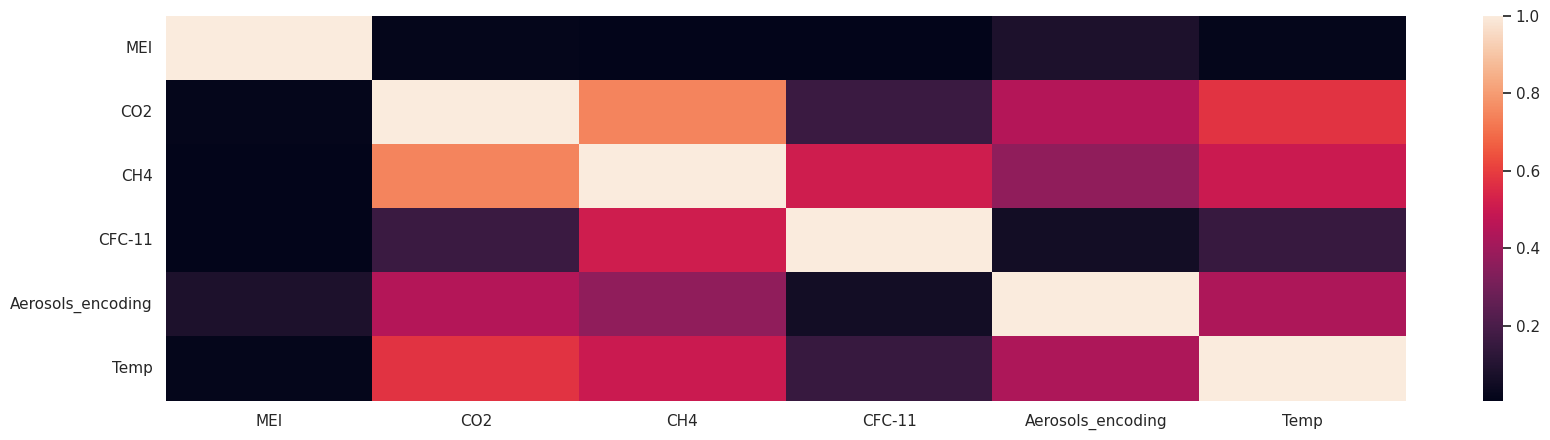

In [ ]:
features_selected = ['MEI', 'CO2', 'CH4', 'CFC-11', 'Aerosols_encoding','Temp']
r2 = (df_selected[features_selected].corr())**2
sms.heatmap(r2)
plt.show()

The next step is to see if dependent variable `Temperature` is correlated with our independent variables. We **calculated R-squared $r^2$ value** here. The darker shades represents lower correlation between the variables.  For example, we can see that `CO2`, `CH4` are not quite correlated with `MEI`.  Below we write a function to select the features based on a threshold.

We used the $r^2$ value since it is a statistical measure representing the **proportion of the variance for a dependent variable that is explained by an independent variable in a regression model**. While the correlation r value simply explains the strength of the relationship between 2 variables, $r^2$ explains the extent to which the **variance of one variable explains the variance of the second variable**.

Here, we are **interested in the variables that are highly correlated to** `Temperature`, which we define as those with a $r^2$ value of **more than 0.5**. From the heatmap above, we can see that `CO2` and `CH4` are the only the variables strongly correlated with our dependent variable `Temperature`.

As shown in our code below, only `CO2` and `CH4` will be added to the list of features selected.

In [ ]:
def corr_features(df, target, threshold):
    corr_features = []
    for feature in df.columns:
        if feature==target: continue
        x = df[feature]
        y = df[target]
        r2 = np.corrcoef(x,y)[0][1]**2
        if abs(r2)>threshold:
            corr_features.append(feature)
    return corr_features

features_selected = corr_features(df_selected, 'Temp', 0.5)
print(f"updated selected features: {features_selected}")

updated selected features: ['CO2', 'CH4']


However, before using these 2 features, we need to **check that our selected features are not correlated amongst each other**. Should `CO2` and `CH4` be strongly correlated, we can just use one of the two variables in our regression model due to the problem of multicollinearity.


Hence, we found the $r^2$ value between the 2 variables as shown below.  

In [ ]:
np.corrcoef(df.CO2, df.CH4)**2

array([[1.        , 0.74470801],
       [0.74470801, 1.        ]])

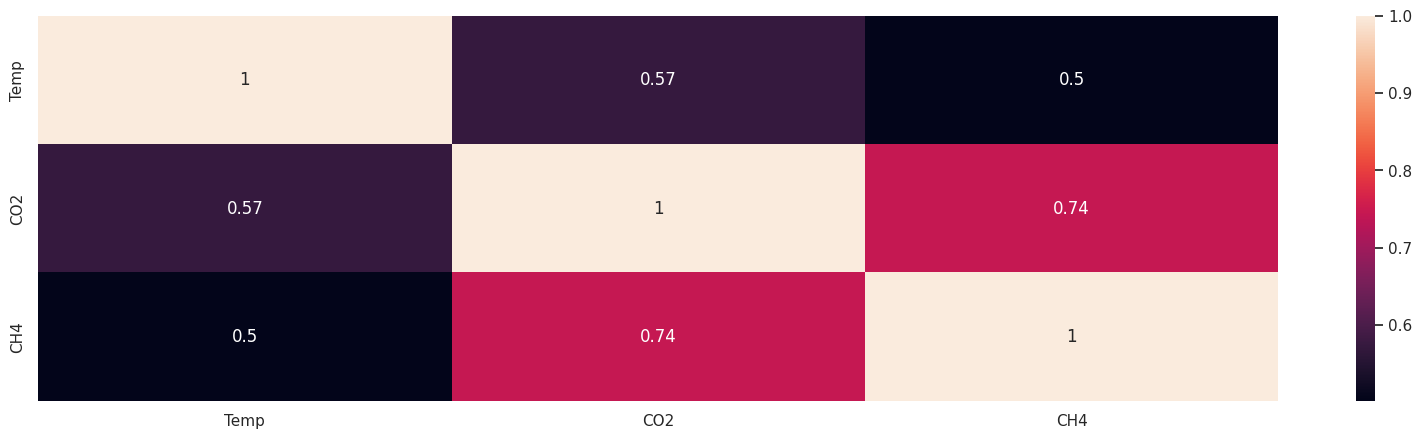

In [ ]:
df_selected[['Temp']+features_selected].corr()
rabs = df_selected[['Temp']+features_selected].corr()**2
sms.heatmap(rabs, annot=True)

plt.show()

Since the correlation coefficient between the two selected features, `CO2` and `CH4`, are above the threshold value of 0.5, they are **strongly correlated**, and thus we can **use one feature to train and test our model**.

We will be using `CO2` to train and test our model.This is because the correlation between `Temperature` and `CO2` have a $r^2$ of 0.57, which is higher compared to that of `Temperature` and `CH4` which is 0.5. Thus, we think that CO2 would be a better predictor of Temp.

### Suitability of Aerosols as a predictor

As we have identified Aerosols as a possible predictor, we decided to attempt to graph the possible relationship between the three variables by assigning a colour to the third dimension, Aerosols.

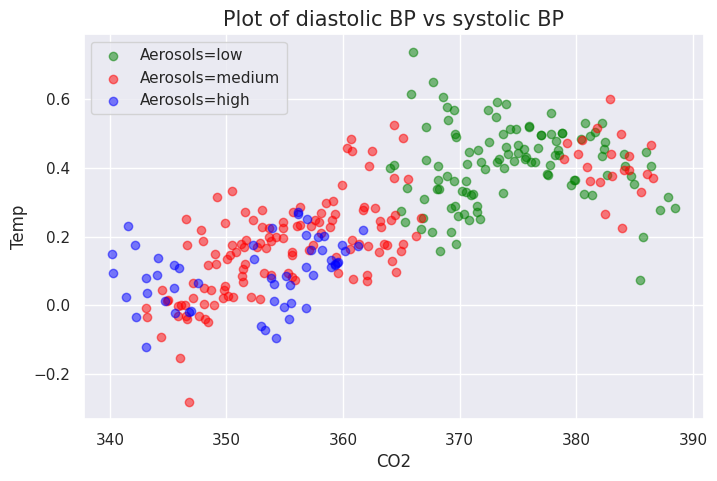

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(df[df.Aerosols_encoding==0].CO2, df[df.Aerosols_encoding==0].Temp, c='green', label='Aerosols=low', alpha=0.5)
plt.scatter(df[df.Aerosols_encoding==1].CO2, df[df.Aerosols_encoding==1].Temp, c='red', label='Aerosols=medium', alpha=0.5)
plt.scatter(df[df.Aerosols_encoding==2].CO2, df[df.Aerosols_encoding==2].Temp, c='blue', label='Aerosols=high', alpha=0.5)
plt.xlabel("CO2", fontsize=12)
plt.ylabel("Temp", fontsize=12)
plt.title("Plot of diastolic BP vs systolic BP", fontsize=15)
plt.legend()
plt.show()

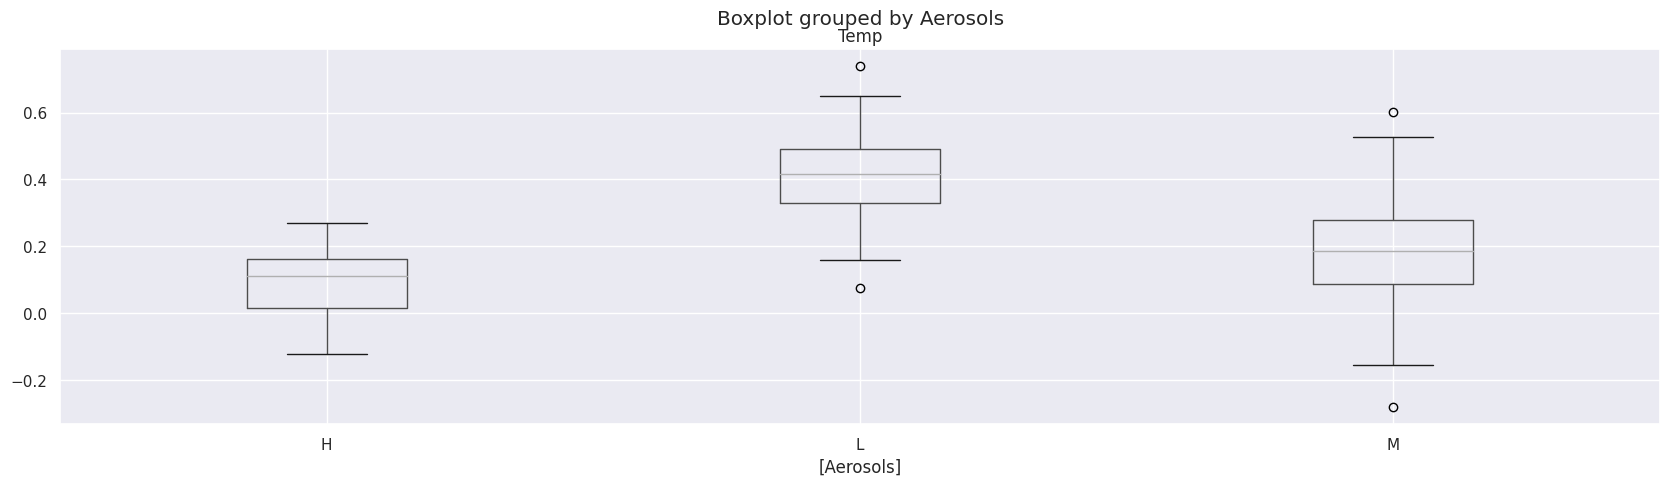

In [ ]:
df[['Temp', 'Aerosols']].boxplot(by='Aerosols')
plt.show()

Visually, we can see that the Aerosol data does not help us clearly separate the datapoints on the CO2 vs Temp graph. Furthermore, when we do a grouped boxplot of Aerosols vs Temp, the separation of the data is also not very convincing, as we have explored in part 1. Hence, we deduce that Aerosols is not very strongly correlated to Temperature, and we drop it too.

**b.** Split the dataset into train and test sets. Describe how you split step by step.

**Response.**

We will distinguish between data that will be used for **model fitting** and data that will be used to **test our model**. This ensures an unbiased estimation of the predictive performance of machine learning models. Hence, we needed to split our dataset into training and test sets.

To do so, we used the `model_selection` package from `scikit-learn` to split our dataset **randomly** into 75/25. This means that we will **keep 25% of the dataset for model evaluation purposes**.

For the purposes of this model, we have set the random_state to 42, for our model to be replicable.

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score

X = df["CO2"]
y = df["Temp"]

#Splitting our dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

**c.** State the model(s) you will train, and explain your choice(s), in **no more than 50 words per model**. You only need to
train one model, but if you do train more models, limit yourself to no more than three---Grading is based on the validity and soundness of your model, rather than the quantity.

**Response.**

We will be training the following models:

1. **`Linear Regression`** model allows us to model the relationship between a scalar response and several explanatory variables. It follows the least squares method to find the best fit for our data.


2. **`Ridge Regression`** model is used to analyse data and find the best fitting model, by adding a penalty term to the traditional least squares regression method. This helps to reduce the effects of multicollinearity and overfitting.


3. **`k-Nearest Neighbours Regression`** is a non-parametric method that approximates the association between independent variables and the continuous outcome by averaging the observations in the same neighbourhood. The size of the neighbourhood needs to be set or can be chosen using cross-validation to select the size that minimises the mean-squared error. (Pinto, 2022)

**d.** For each model, perform the training, and report the trained parameters and the training scores, if applicable.

**Response.**

### **Model 1: Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error as MSE, r2_score, mean_absolute_percentage_error as MAPE, mean_absolute_error as MAE

lin_reg = LinearRegression().fit(X_train, y_train)

lin_reg_r2 = lin_reg.score(X_train, y_train)
lin_reg_test = lin_reg.score(X_test, y_test)
lin_reg_coef = lin_reg.coef_
lin_reg_bias1 = lin_reg.intercept_

lin_MAPEscore_test = MAPE(y_test, lin_reg.predict(X_test))
lin_MAEscore_test = MAE(y_test,lin_reg.predict(X_test))
ave = np.mean(y_test)
lin_MAEPctOfMean = (lin_MAEscore_test/ave)*100


print("Model 1: Linear Regression ")
print("--------------------------")
print(f"Features : CO2")
print(f"Coefficients: {lin_reg_coef[0]}")
print(f"Intercept : {lin_reg_bias1}")
print(f"Training accuracy: {lin_reg_r2}")
print(f"Testing accuracy: {lin_reg_test}")
print(f"Coeff of Determination : {lin_reg_r2}")


Model 1: Linear Regression 
--------------------------
Features : CO2
Coefficients: 0.011011906276954008
Intercept : -3.7442375445718667
Training accuracy: 0.6067183466144161
Testing accuracy: 0.4795430794929826
Coeff of Determination : 0.6067183466144161


From the code above, we derived the following equation that represents the relationship between the predictor variable with `Temp`:

$ Temp = -3.7442 + 0.0110119  \times CO2 $

We also included a graph for visualisation of our linear model as shown below.

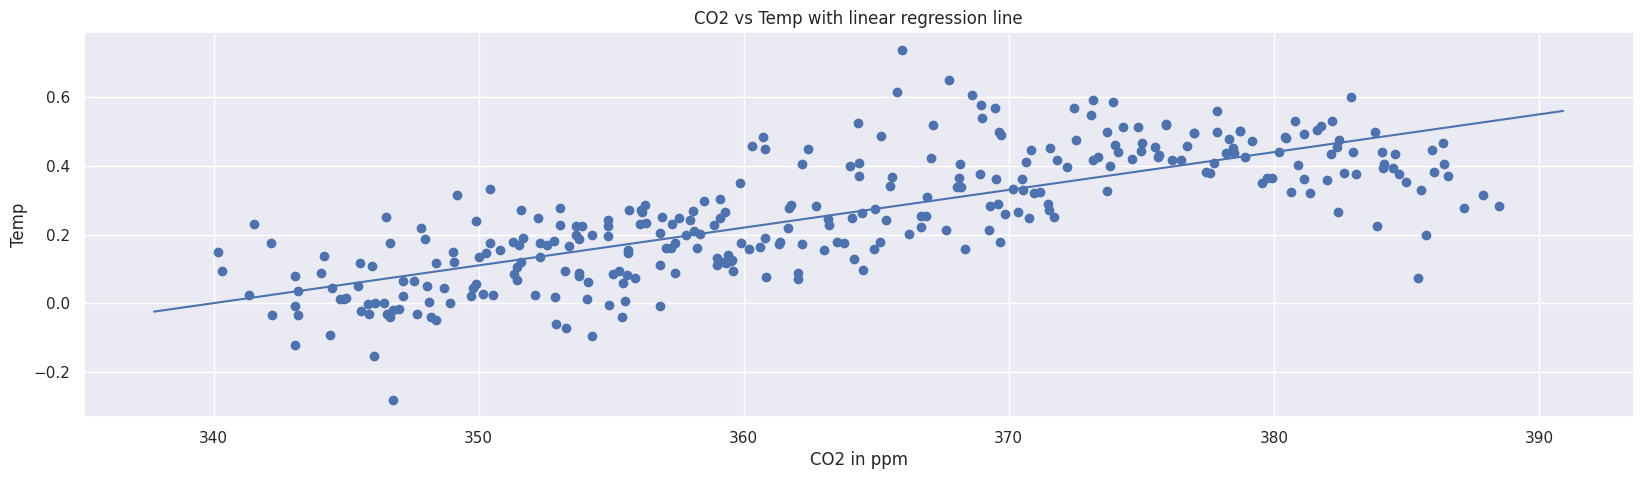

In [ ]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals,)

plt.scatter(df.CO2, df.Temp)
plt.title("CO2 vs Temp with linear regression line")
plt.xlabel("CO2 in ppm", fontsize=12)
plt.ylabel("Temp", fontsize=12)
abline(0.0110119,-3.7442)

### **Model 2: Ridge Regression**

In [ ]:
ridge_reg = Ridge().fit(X_train, y_train)

ridge_reg_r2 = ridge_reg.score(X_train, y_train)
ridge_reg_test = ridge_reg.score(X_test, y_test)
ridge_reg_coef = ridge_reg.coef_
ridge_reg_bias1 = ridge_reg.intercept_

ridge_MAPEscore_test = MAPE(y_test, ridge_reg.predict(X_test))
ridge_MAEscore_test = MAE(y_test,ridge_reg.predict(X_test))
ridge_MAEPctOfMean = (ridge_MAEscore_test/ave)*100

print("Model 2: Ridge Regression ")
print("--------------------------")
print(f"Features : CO2")
print(f"Coefficients: {ridge_reg_coef[0]}")
print(f"Intercept : {ridge_reg_bias1}")
print(f"Training accuracy: {ridge_reg_r2}")
print(f"Testing accuracy: {ridge_reg_test}")
print(f"Coeff of Determination : {ridge_reg_r2}")

Model 2: Ridge Regression 
--------------------------
Features : CO2
Coefficients: 0.011011600038975937
Intercept : -3.7441261885882344
Training accuracy: 0.606718346145192
Testing accuracy: 0.4795459594534617
Coeff of Determination : 0.606718346145192


From the code above, we derived the following equation that represents the relationship between the predictor variable with `Temp`:

$ Temp = -3.7441 + 0.0110116  \times CO2 $

We also included a graph for visualisation of the ridge model below.

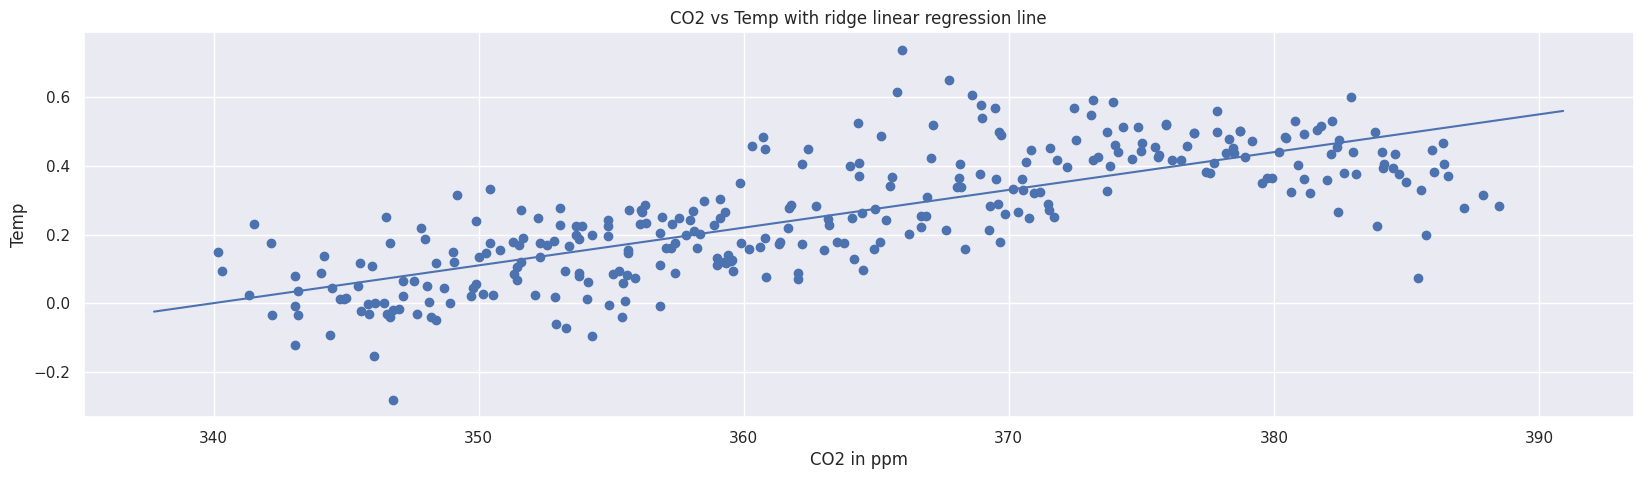

In [ ]:
plt.scatter(df.CO2, df.Temp)
plt.title("CO2 vs Temp with ridge linear regression line")
plt.xlabel("CO2 in ppm", fontsize=12)
plt.ylabel("Temp", fontsize=12)
abline(0.0110116,-3.7441)

### **Model 3: k-Neighbours Regression**

For kNN regression, we need to determine the number of nearest neighbour to select from. Also, we have to choose how much weight each point will have on our prediction: whether every point will have the same weight (uniform), or closer points will have a larger weight (distance).

As such, we use a technique called Grid Search, with K-Fold cross validation. Essentially we further split the training set into 10 splits. For each set of parameters, we will fit the model to split 1-9, with split 10 being used as a validation split, and calculate the Root mean square error. We then continue the process until we have calculated the RMSE for all 10 possible combinations, then we take the mean RMSE from the 10 iterations. Then, we repeat this until we have iterated through all possible parameter combinations, and we choose the combination of parameters that gives us the lowest mean RMSE. (Scikit-learn, n.d.)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
kNNRegressor = KNeighborsRegressor()
k_range = list(range(1, 51))
parameters = {'weights':('uniform','distance'), 'n_neighbors':k_range}

#kNN = kNNRegressor.fit(X_train, y_train)

#grid search for best parameters
from sklearn.model_selection import GridSearchCV
cv = KFold(n_splits=10, shuffle=True, random_state=42)
clf = GridSearchCV(kNNRegressor, parameters, cv=cv, scoring='neg_mean_squared_error', return_train_score=False,verbose=1)
clf.fit(X_train, y_train);

sorted(clf.cv_results_.keys())
print(f"Weights: {clf.best_estimator_.weights}")
print(f"Number of Neighbours: {clf.best_estimator_.n_neighbors}")


# kNN_score_train = -1 * cross_val_score(kNN, X_train, y_train, cv=cv, scoring='neg_root_mean_squared_error').mean()
# kNN_score_test = MSE(y_test, kNN.predict(X_test), squared=False)
# kNN_score_test

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Weights: uniform
Number of Neighbours: 32


From the Grid Search, we can conclude that we should use 32 neighbours, and weight each data point uniformly.

In [ ]:
kNN = KNeighborsRegressor(n_neighbors=32).fit(X_train,y_train)

kNN_r2 = kNN.score(X_train, y_train)
kNN_test = kNN.score(X_test, y_test)
kNN_n_samples = kNN.n_samples_fit_
kNN_effective_metric_ = kNN.effective_metric_

print("Model 3: kNN Regression ")
print("--------------------------")
print(f"Features : CO2")
print(f"Number of samples: {kNN_n_samples}")
print(f"Distance Metric : {kNN_effective_metric_}")
print(f"Training accuracy: {kNN_r2}")
print(f"Testing accuracy: {kNN_test}")
print(f"Coeff of Determination : {kNN_r2}")
print(f"Weights: {clf.best_estimator_.weights}")
print(f"Number of Neighbours: {clf.best_estimator_.n_neighbors}")

Model 3: kNN Regression 
--------------------------
Features : CO2
Number of samples: 231
Distance Metric : euclidean
Training accuracy: 0.6822546794621442
Testing accuracy: 0.5832888799427207
Coeff of Determination : 0.6822546794621442
Weights: uniform
Number of Neighbours: 32


We've also included a visualisation of the kNN model below. Note that there are two separate lines, one for the predicted values for the train dataset, and one for the predicted values for the test dataset.

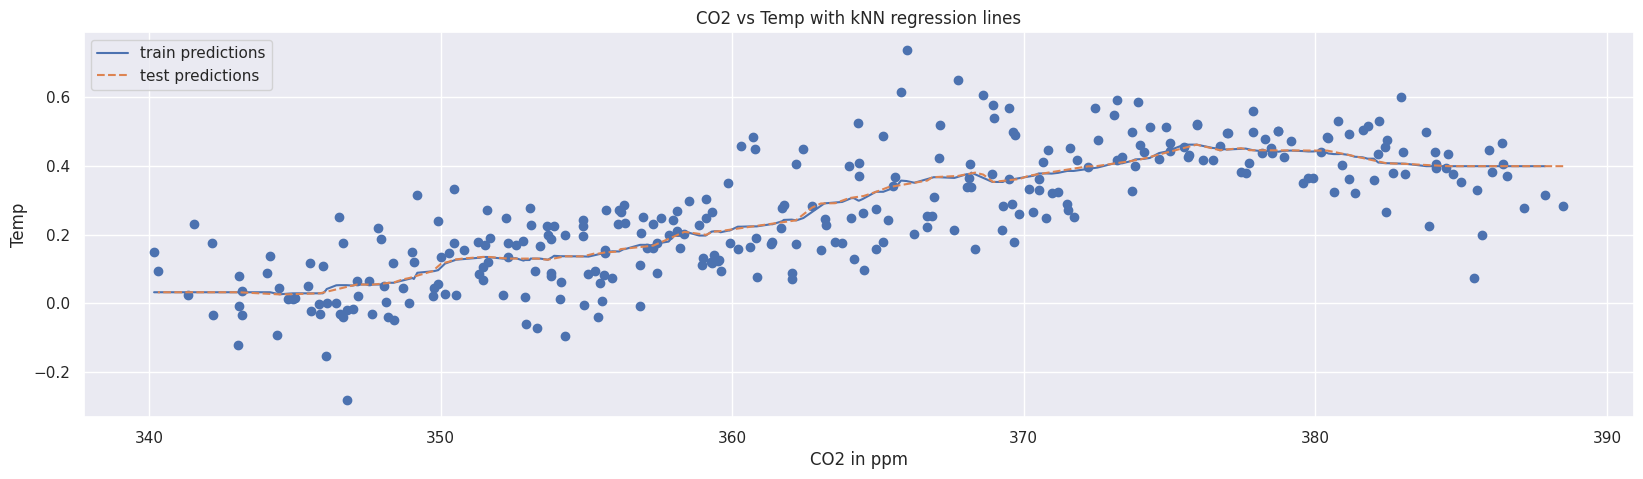

In [ ]:
X_train_reshaped = X_train.reshape(231,)
arr1inds = X_train_reshaped.argsort()
sorted_X_train = X_train[arr1inds[::-1]]
sorted_y_train = y_train.to_numpy()[arr1inds[::-1]]

X_test_reshaped = X_test.reshape(77,)
arr1inds = X_test_reshaped.argsort()
sorted_X_test = X_test[arr1inds[::-1]]
sorted_y_test = y_test.to_numpy()[arr1inds[::-1]]



plt.scatter(df.CO2, df.Temp)
plt.plot(sorted_X_train, kNN.predict(sorted_X_train) , label="train predictions") # train line
plt.plot(sorted_X_test, kNN.predict(sorted_X_test),  '--', label="test predictions") # test line
plt.xlabel("CO2 in ppm", fontsize=12)
plt.ylabel("Temp", fontsize=12)
plt.title("CO2 vs Temp with kNN regression lines")
plt.legend(loc="upper left")


## 3. Model evaluation and selection [30% of Part II]

**a.** For each model, predict the response variable on the test set.

In [ ]:
y_pred_lin = lin_reg.predict(X_test)

y_pred_ridge = ridge_reg.predict(X_test)

y_pred_kNN = kNN.predict(X_test)


**Response.**

**b.** Describe the metric you use to evaluate your model(s). Report the test scores for each model.

We will evaluate our models using the **Mean Absolute Error (MAE)** and **Root Mean Squared Error (RMSE) metrics**. These are the most common metrics used to measure accuracy for continuous variables. These metrics can calculate the accuracy of our predictions and the amount of deviation from the actual values (Chai & Draxler, 2014).

**MAE** measures the **average magnitude of the errors** in a set of predictions, **without considering their direction at all**. It is the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight.

**RMSE** is a **quadratic scoring rule** that also measures the average magnitude of the error. It is the square root of the average of squared differences between prediction and actual observation. (Scikit-learn, n.d.)

The difference between the 2 evaluation metrics is that in RMSE, since the errors are squared before they are averaged, the it gives a relatively **high weight to larger errors**. This suggests that the RMSE would be more **useful when significant errors are undesirable.**

### **Model 1: Linear Regression**

In [ ]:
# from sklearn.metrics import mean_squared_error
lin_RMSEscore_test = MSE(y_test, lin_reg.predict(X_test), squared=False)
lin_MAEscore_test = MAE(y_test,lin_reg.predict(X_test))

ave = np.mean(y_test)
max_min_range = np.max(y_test) - np.min(y_test)

lin_MAEPctOfRange = (lin_MAEscore_test/max_min_range)*100
lin_RMSEPctOfRange = (lin_RMSEscore_test/max_min_range)*100

print(f"MAE: {lin_MAEscore_test:}")
print(f"RMSE: {lin_RMSEscore_test:}")
print(f"MAE as % of range: {lin_MAEPctOfRange:.3f}")
print(f"RMSE as % of range: {lin_RMSEPctOfRange:.3f}")
print(f"Difference between maximum and minimum: {max_min_range}")

MAE: 0.10440717309056215
RMSE: 0.13453459467744433
MAE as % of range: 13.958
RMSE as % of range: 17.986
Difference between maximum and minimum: 0.748


### **Model 2: Ridge Regression**

In [ ]:
ridge_MAEscore_test = MAE(y_test,ridge_reg.predict(X_test))
ridge_RMSEscore_test = MSE(y_test, ridge_reg.predict(X_test), squared=False)

ridge_MAEPctOfRange = (ridge_MAEscore_test/max_min_range)*100
ridge_RMSEPctOfRange = (ridge_RMSEscore_test/max_min_range)*100

print(f"MAE: {ridge_MAEscore_test:}")
print(f"RMSE: {ridge_RMSEscore_test:}")
print(f"MAE as % of range: {ridge_MAEPctOfRange:.3f}")
print(f"RMSE as % of range: {ridge_RMSEPctOfRange:.3f}")

MAE: 0.10440692660178805
RMSE: 0.13453422245177446
MAE as % of range: 13.958
RMSE as % of range: 17.986


### **Model 3: k-Nearest Neighbour Regression**

In [ ]:
kNN_MAEscore_test = MAE(y_test,kNN.predict(X_test))
kNN_RMSEscore_test = MSE(y_test, kNN.predict(X_test), squared=False)

kNN_MAEPctOfRange = (kNN_MAEscore_test/max_min_range)*100
kNN_RMSEPctOfRange = (kNN_RMSEscore_test/max_min_range)*100

print(f"MAE: {kNN_MAEscore_test:}")
print(f"RMSE: {kNN_RMSEscore_test:}")
print(f"MAE as % of range: {kNN_MAEPctOfRange:.3f}")
print(f"RMSE as % of range: {kNN_RMSEPctOfRange:.3f}")

MAE: 0.09519602272727272
RMSE: 0.12038132681979913
MAE as % of range: 12.727
RMSE as % of range: 16.094


### **Evaluation Conclusion**

Based on the evaluation metrics on the test set for the different models, we would select the model with the best evaluation score. Of the three models, `k-Nearest Neighbours Regression` has the **lowest MAE score and RMSE score**. The evaluation scores of `Linear Regression` and `Ridge` are very close to each other, where `Linear Regression` has a **slightly higher MAE score** than `Ridge`, and `Ridge` has a **slightly lower RMSE score** than `Linear Regression`. Hence, we concluded that the `k-Nearest Neighbours Regression` model is the best.

**c.** If you trained more than one model, identify the final model you would choose for the prediction task, and explain your choice, **in no more than 50 words**.

**Response.**

We decided to choose the **k-Nearest Neighbours Regression model**, our third model for the prediction task, since it is our best model according to our evaluation metrics and conclusion as stated above. However, we should be aware of the limitations of kNN regression, as its performance will struggle to outlier data given that it predicts based on the average of the k nearest datapoints.

## 4. Findings and conclusion [20% of Part II]

**a.** Interpret what your model is implying, and summarize any insight you have drawn from the project. Explain if it is consistent with intuition, and if not, provide a plausible justification. Limit your entire response to **50 words**.

**Response.**

It implies that given a CO2 datapoint, the resulting temperature can be predicted by the average of the temperatures associated with the closest known CO2 datapoints. It is consistent with our intuition as CO2 is a greenhouse gas, and thus similar levels of CO2 should have similar temperature levels.

**b.** Share any lesson you have learned from the project, in **no more than 50 words**.

**Response.**

We've learned most about the various python libraries to assist us in data analysis. Beyond what we've learnt in the classroom, through this project we've also had the chance to explore different statistical tests to help us in our analysis, such as the chi squared test.

## 5. Non-technical protocol [5% of Part II]

**a.** Describe the detailed contribution of each team member, including both the tangible (e.g., implementation, testing, writing) and intangible (e.g., generating ideas, planning, leadership) efforts.

**Response.**

**Wong Boon Jhee:** Boon Jhee would start on certain areas to have a better understanding of the problem's requirement so that the team will be better prepared. He would also do extra research and testing on difficult topics to see if they would be suitable for this project and explain them in simpler terms to the rest of the team to understand. Beyond that, Boon Jhee also assists the team in their work if they run into any technical difficulties.

**Amelia Chew:** Amelia worked on the writeups and graphed the categorical variables, where she constantly cross referenced the labs and external research. Within that, she meticulously checked every line to ensure that the logical flow and formatting of the whole report are consistent and coherent.

**Nicholas Pey:** Nicholas helped with correcting the writeups to make sure they are aligned with what is taught in labs and what is asked in the question. He also helped to add helper data to allow the reader to understand our answers better.

**Timothy Koh:** Timothy plotted the numerical datasets and created the required graphs to provide visual representations. Additionally, he engaged in data transformation as needed and was involved in the process of ideating which model to use for the training data.

**Axel Wong:** Axel contributed to the project by assisting with the evaluation of the regression models and analyzing the categorical variables. Additionally, Axel carefully reviewed the entire document to ensure that it had a cohesive and logical flow.




**b.** List any references and sources you have cited.

**Response.**

Chai, T., & Draxler, R. R. (2014). Root mean square error (RMSE) or mean absolute error (MAE). Geoscientific model development discussions, 7(1), 1525-1534.

Scikit-learn. (n.d.). sklearn.neighbors.KNeighborsRegressor. Retrieved March 29, 2023, from https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

Scikit-learn. (n.d.). Cross-validation: evaluating estimator performance. Retrieved March 29, 2023, from https://scikit-learn.org/stable/modules/cross_validation.html

Pinto, T. (2022). Linear Regression. In Regression and Classification. Retrieved March 29, 2023, from https://bookdown.org/tpinto_home/Regression-and-Classification/linear-regression.html

Marine Data Science. (2019). Normalizing the RMSE. Marine Data Science. Retrieved March 29, 2023, from https://www.marinedatascience.co/blog/2019/01/07/normalizing-the-rmse/